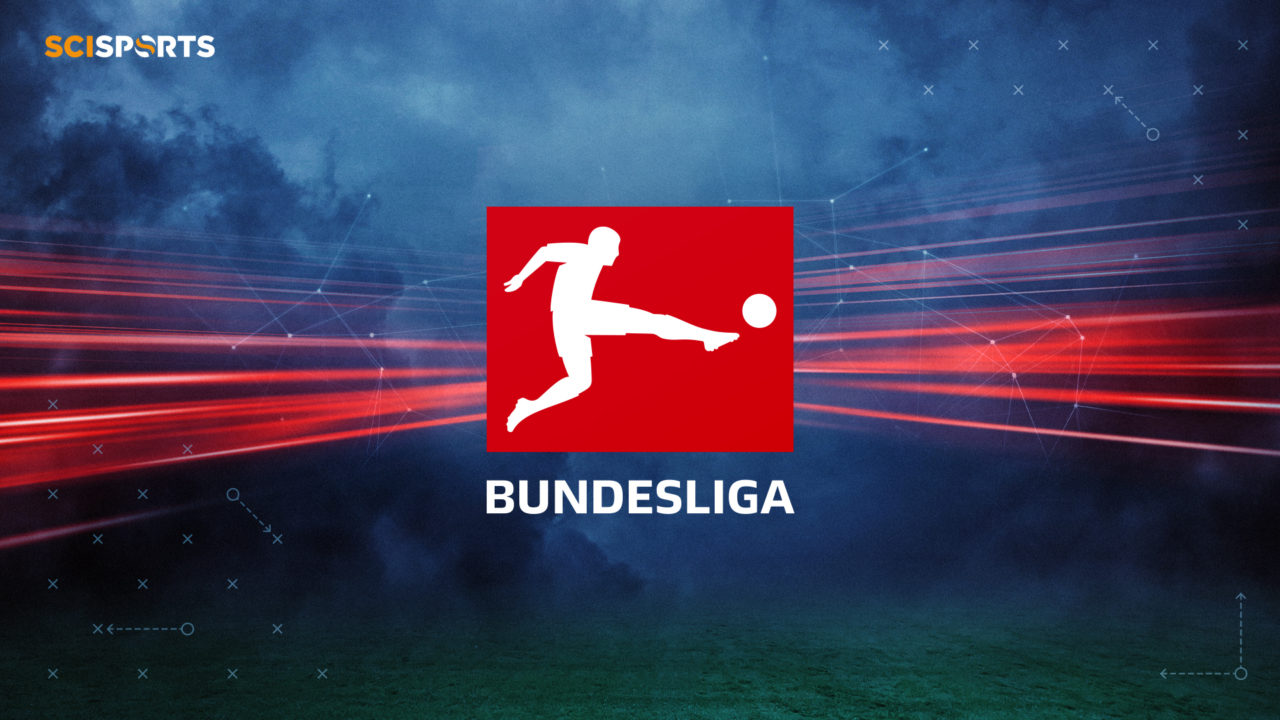

# The Data

We are using data publicly provided by https://football-data.co.uk/, https://www.kaggle.com/datasets/slehkyi/extended-football-stats-for-european-leagues-xg?resource=download and https://www.fifaindex.com/. The data that we exctracted and we are going to use are listed below:

- **FTR**: Full Time Result ('H'=home win, 'A'= Away win, 'D'= Draw)
- **Date**: Match Date
- **HomeTeam**: Home Team
- **AwayTeam**: Away Team
- **FTHG**: Full Time Home Team Goals
- **FTAG**: Full Time Away Team Goals
- **HTHG**: Half Time Home Team Goals
- **HTAG**: Half Time Away Team Goals
- **HS**: Home Team Shots
- **AS**: Away Team Shots
- **HST**: Home Team Shots on Target
- **AST**: Away Team Shots on Target
- **HC**: Home Team Corners
- **AC**: Away Team Corners
- **HF**: Home Team Fouls
- **AF**: Away Team Fouls
- **league**: League
- **HTxpts**: Home team expected points
- **ATxpts**: Away team expected points
- **HxG**: Home Team xGoals
- **AxG**: Away Team xGoals
- **Hdeep**: Passes that home team completed within an estimated 20 yards of goal (crosses excluded)
- **Adeep**: Passes that away team completed within an estimated 20 yards of goal (crosses excluded)
- **Hppda_coef**: Passes that home team allowed per defensive action in the opposition half (power of pressure)
- **Appda_coef**: Passes that away team allowed per defensive action in the opposition half (power of pressure)
- **HTatt_S**: Home team attack rating
- **HTmid_S**: Home team midfield rating
- **HTdef_S**: Home team defense rating
- **HTOVA_S**: Home team overall rating
- **ATatt_S**: Away team attack rating
- **ATmid_S**: Away team midfield rating
- **ATdef_S**: Away team defense rating
- **ATOVA_S**: Away team overall rating
- **AVGH**: Average Home Win Odds 
- **AVGD**: Average Draw Odds
- **AVGA**: Average Away Win Odds
- **season**: Season

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('bmh')

In [3]:
s1415 = pd.read_csv(r'C:\Users\George\Desktop\football-match-prediction-using-ml-techniques\data\Bundesliga\bundesliga-1415.csv')
s1516 = pd.read_csv(r'C:\Users\George\Desktop\football-match-prediction-using-ml-techniques\data\Bundesliga\bundesliga-1516.csv')
s1617 = pd.read_csv(r'C:\Users\George\Desktop\football-match-prediction-using-ml-techniques\data\Bundesliga\bundesliga-1617.csv')
s1718 = pd.read_csv(r'C:\Users\George\Desktop\football-match-prediction-using-ml-techniques\data\Bundesliga\bundesliga-1718.csv')
s1819 = pd.read_csv(r'C:\Users\George\Desktop\football-match-prediction-using-ml-techniques\data\Bundesliga\bundesliga-1819.csv')
s1920 = pd.read_csv(r'C:\Users\George\Desktop\football-match-prediction-using-ml-techniques\data\Bundesliga\bundesliga-1920.csv')

In [4]:
df = pd.concat([s1415, s1516, s1617, s1718, s1819, s1920]).reset_index(drop=True)

In [5]:
df.head()

Date       HomeTeam    AwayTeam  FTHG  FTAG  HTHG  HTAG FTR  HS  AS  \
0  2014-08-22  Bayern Munich   Wolfsburg     2     1     1     0   H  17   9   
1  2014-08-23       Dortmund  Leverkusen     0     2     0     1   A  11  11   
2  2014-08-23  Ein Frankfurt    Freiburg     1     0     1     0   H  10  13   
3  2014-08-23        FC Koln     Hamburg     0     0     0     0   D  10  19   
4  2014-08-23       Hannover  Schalke 04     2     1     0     0   H   8  12   

   ...  HTmid_S  HTdef_S  ATOVA_S  ATatt_S  ATmid_S  ATdef_S  AVGH  AVGD  \
0  ...       85       82       78       77       78       76  1.26  6.37   
1  ...       81       81       76       78       77       74  1.62  4.23   
2  ...       70       73       72       71       71       72  2.06  3.46   
3  ...       72       72       75       76       73       72  2.04  3.59   
4  ...       74       73       78       83       77       76  3.11  3.44   

    AVGA     season  
0  11.50  2014/2015  
1   5.39  2014/2015  
2   3.76  2014/2015  
3   3.67  2014/2015  
4   2.34  2014/2015  

[5 rows x 38 columns]

In [6]:
df.tail()

Date       HomeTeam            AwayTeam  FTHG  FTAG  HTHG  HTAG  \
1831  2020-06-27     Leverkusen               Mainz     1     0     1     0   
1832  2020-06-27     M'gladbach              Hertha     2     1     1     0   
1833  2020-06-27   Union Berlin  Fortuna Dusseldorf     3     0     1     0   
1834  2020-06-27  Werder Bremen             FC Koln     6     1     3     0   
1835  2020-06-27      Wolfsburg       Bayern Munich     0     4     0     2   

     FTR  HS  AS  ...  HTmid_S  HTdef_S  ATOVA_S  ATatt_S  ATmid_S  ATdef_S  \
1831   H  13   6  ...       80       79       75       75       73       75   
1832   H  22   4  ...       79       78       76       77       75       75   
1833   H  11  25  ...       71       73       73       73       74       72   
1834   H  18   6  ...       76       77       75       76       75       73   
1835   A  11  17  ...       77       78       84       87       85       81   

      AVGH  AVGD   AVGA     season  
1831  1.25  6.53  10.21  2019/2020  
1832  1.34  5.60   8.07  2019/2020  
1833  3.89  3.64   1.95  2019/2020  
1834  1.60  4.39   5.10  2019/2020  
1835  4.29  4.50   1.69  2019/2020  

[5 rows x 38 columns]

In [7]:
df.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'FTR',
       'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'round', 'league',
       'HxG', 'AxG', 'Hdeep', 'Adeep', 'HTxpts', 'Hppda_coef', 'Appda_coef',
       'ATxpts', 'HTOVA_S', 'HTatt_S', 'HTmid_S', 'HTdef_S', 'ATOVA_S',
       'ATatt_S', 'ATmid_S', 'ATdef_S', 'AVGH', 'AVGD', 'AVGA', 'season'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1836 non-null   object 
 1   HomeTeam    1836 non-null   object 
 2   AwayTeam    1836 non-null   object 
 3   FTHG        1836 non-null   int64  
 4   FTAG        1836 non-null   int64  
 5   HTHG        1836 non-null   int64  
 6   HTAG        1836 non-null   int64  
 7   FTR         1836 non-null   object 
 8   HS          1836 non-null   int64  
 9   AS          1836 non-null   int64  
 10  HST         1836 non-null   int64  
 11  AST         1836 non-null   int64  
 12  HC          1836 non-null   int64  
 13  AC          1836 non-null   int64  
 14  HF          1836 non-null   int64  
 15  AF          1836 non-null   int64  
 16  round       1836 non-null   int64  
 17  league      1836 non-null   object 
 18  HxG         1836 non-null   float64
 19  AxG         1836 non-null  

In [9]:
df.describe().transpose()

count       mean       std        min        25%        50%  \
FTHG        1836.0   1.643791  1.367796   0.000000   1.000000   1.000000   
FTAG        1836.0   1.295207  1.223743   0.000000   0.000000   1.000000   
HTHG        1836.0   0.720588  0.833777   0.000000   0.000000   1.000000   
HTAG        1836.0   0.549564  0.733210   0.000000   0.000000   0.000000   
HS          1836.0  14.142702  5.231044   1.000000  10.000000  14.000000   
AS          1836.0  11.710784  4.693170   0.000000   8.000000  11.000000   
HST         1836.0   5.100763  2.687377   0.000000   3.000000   5.000000   
AST         1836.0   4.247277  2.397289   0.000000   2.750000   4.000000   
HC          1836.0   5.265251  2.918309   0.000000   3.000000   5.000000   
AC          1836.0   4.392157  2.508802   0.000000   3.000000   4.000000   
HF          1836.0  13.047386  4.267160   2.000000  10.000000  13.000000   
AF          1836.0  13.730937  4.466593   2.000000  11.000000  13.000000   
round       1836.0   1.500000  0.500136   1.000000   1.000000   1.500000   
HxG         1836.0   1.605626  0.934592   0.025462   0.909642   1.450830   
AxG         1836.0   1.259045  0.812003   0.000000   0.660083   1.096935   
Hdeep       1836.0   6.603486  4.056370   0.000000   4.000000   6.000000   
Adeep       1836.0   5.333878  3.637403   0.000000   3.000000   5.000000   
HTxpts      1836.0   1.596346  0.825992   0.002500   0.924475   1.623300   
Hppda_coef  1836.0  10.367010  5.824247   1.897436   6.549597   8.892045   
Appda_coef  1836.0  11.974748  8.603520   2.121951   7.000000  10.045833   
ATxpts      1836.0   1.176618  0.804048   0.000000   0.503275   1.064900   
HTOVA_S     1836.0  76.509259  3.349476  69.000000  74.000000  76.000000   
HTatt_S     1836.0  77.074074  3.906672  68.000000  75.000000  77.000000   
HTmid_S     1836.0  76.185185  3.637605  68.000000  74.000000  76.000000   
HTdef_S     1836.0  75.777778  3.337944  68.000000  73.000000  75.000000   
ATOVA_S     1836.0  76.509259  3.349476  69.000000  74.000000  76.000000   
ATatt_S     1836.0  77.074074  3.906672  68.000000  75.000000  77.000000   
ATmid_S     1836.0  76.185185  3.637605  68.000000  74.000000  76.000000   
ATdef_S     1836.0  75.777778  3.337944  68.000000  73.000000  75.000000   
AVGH        1836.0   2.829090  2.265960   1.030000   1.717500   2.220000   
AVGD        1836.0   4.224025  1.488717   3.030000   3.450000   3.695000   
AVGA        1836.0   4.640027  4.509174   1.130000   2.450000   3.310000   

                  75%         max  
FTHG         2.000000    8.000000  
FTAG         2.000000    6.000000  
HTHG         1.000000    6.000000  
HTAG         1.000000    4.000000  
HS          17.000000   36.000000  
AS          15.000000   32.000000  
HST          7.000000   16.000000  
AST          6.000000   14.000000  
HC           7.000000   19.000000  
AC           6.000000   14.000000  
HF          16.000000   29.000000  
AF          17.000000   30.000000  
round        2.000000    2.000000  
HxG          2.128413    6.029310  
AxG          1.718580    5.940230  
Hdeep        9.000000   32.000000  
Adeep        7.000000   27.000000  
HTxpts       2.279425    3.000000  
Hppda_coef  12.548790   65.857143  
Appda_coef  14.158421  152.000000  
ATxpts       1.778375    2.995300  
HTOVA_S     78.000000   86.000000  
HTatt_S     79.000000   91.000000  
HTmid_S     78.000000   85.000000  
HTdef_S     78.000000   86.000000  
ATOVA_S     78.000000   86.000000  
ATatt_S     79.000000   91.000000  
ATmid_S     78.000000   85.000000  
ATdef_S     78.000000   86.000000  
AVGH         2.900000   22.750000  
AVGD         4.312500   21.000000  
AVGA         4.970000   43.670000

**We are going to plot some general information for the league.**

Text(0, 0.5, 'Total Goals')

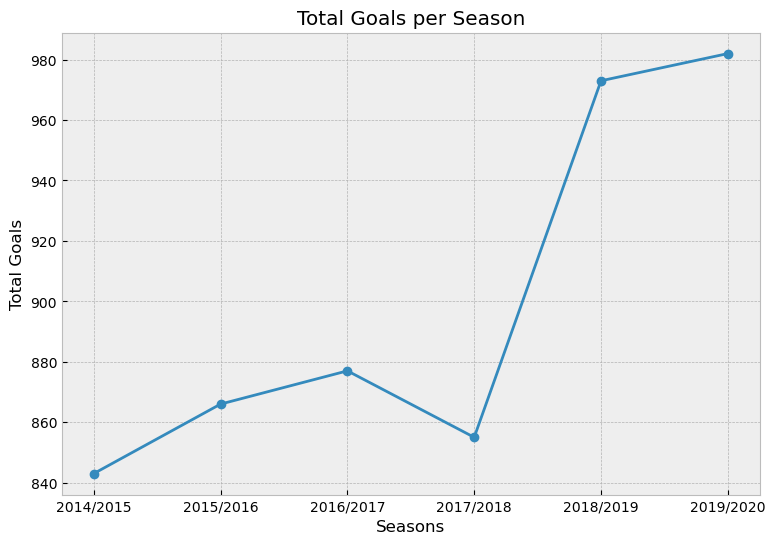

In [10]:
plt.figure(figsize=(9,6))

plt.plot(df['season'].unique(), df.groupby('season')['FTHG'].sum()+df.groupby('season')['FTAG'].sum(), marker = 'o')

plt.title('Total Goals per Season')
plt.xlabel('Seasons')
plt.ylabel('Total Goals')


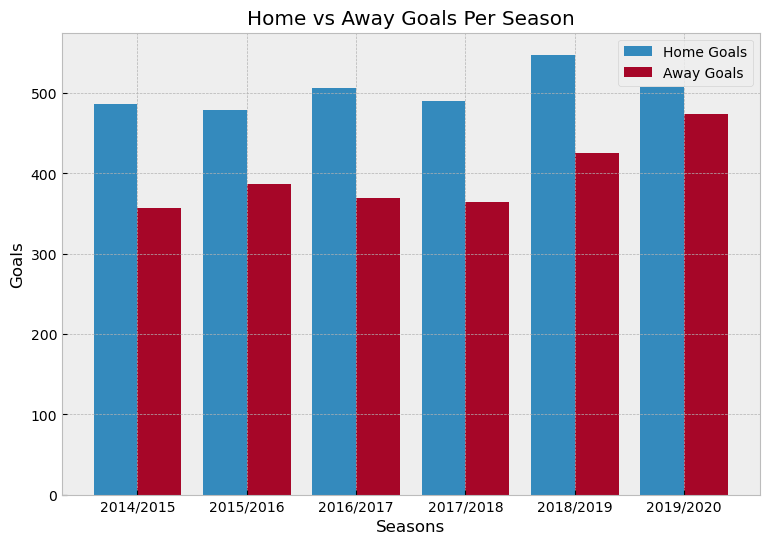

In [11]:
plt.figure(figsize=(9,6))

X_label = df['season'].unique()
X_axis = np.arange(len(df['season'].unique()))

plt.bar(X_axis - 0.2, df.groupby('season')['FTHG'].sum(),0.4, label = 'Home Goals')
plt.bar(X_axis + 0.2, df.groupby('season')['FTAG'].sum(),0.4, label = 'Away Goals')

plt.xticks(X_axis, X_label)
plt.title('Home vs Away Goals Per Season')
plt.xlabel('Seasons')
plt.ylabel('Goals')

plt.legend()

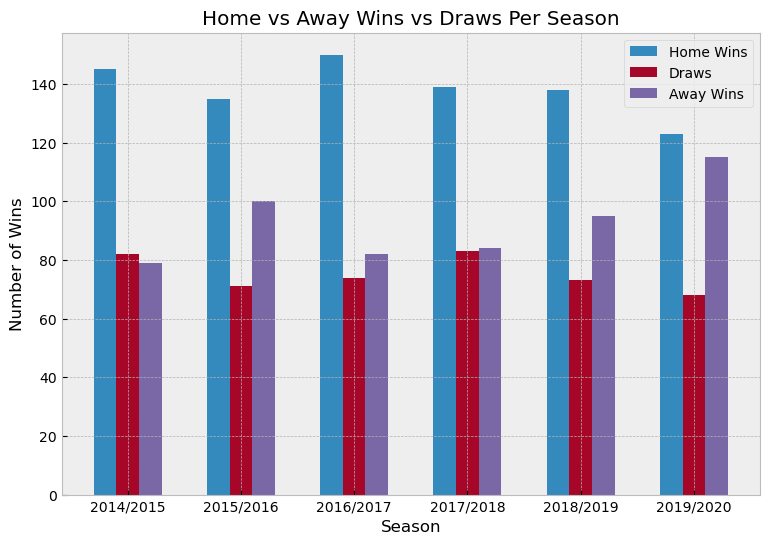

In [12]:
plt.figure(figsize=(9,6))

X_label = df['season'].unique()
X_axis = np.arange(len(df['season'].unique()))

plt.bar(X_axis - 0.2, df.groupby('season')['FTR'].apply(lambda x: (x == 'H').sum()),0.2, label = 'Home Wins')
plt.bar(X_axis, df.groupby('season')['FTR'].apply(lambda x: (x == 'D').sum()),0.2, label = 'Draws')
plt.bar(X_axis + 0.2, df.groupby('season')['FTR'].apply(lambda x: (x == 'A').sum()),0.2, label = 'Away Wins')

plt.xticks(X_axis, X_label)
plt.title('Home vs Away Wins vs Draws Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Wins')

plt.legend()

Text(0.5, 1.0, 'Top scoring teams at home')

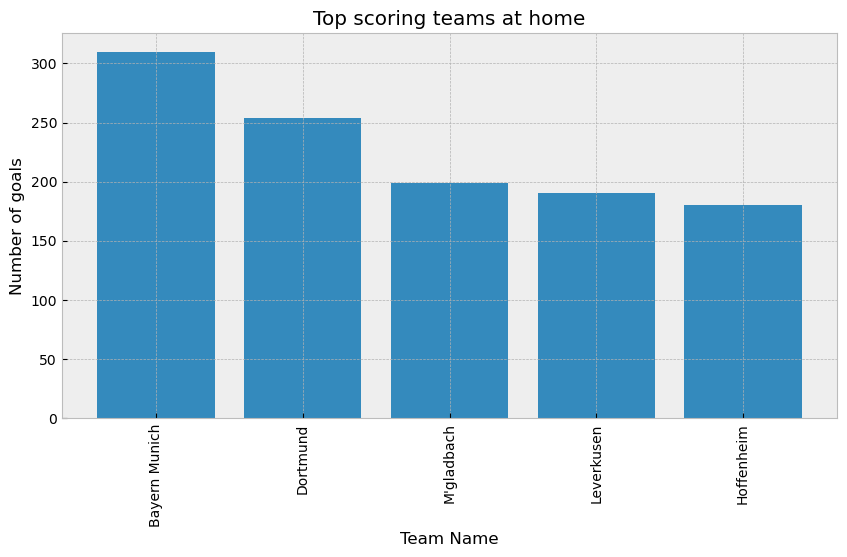

In [13]:
X_label = df.groupby('HomeTeam')['FTHG'].sum().sort_values(ascending=False).head(5).index

plt.figure(figsize=(10,5))

plt.bar(range(5),df.groupby('HomeTeam')['FTHG'].sum().sort_values(ascending=False).head(5))

plt.xticks(np.arange(5),X_label, rotation = 'vertical')
plt.xlabel('Team Name')
plt.ylabel('Number of goals')
plt.title('Top scoring teams at home')

Text(0, 0.5, 'Number of Wins')

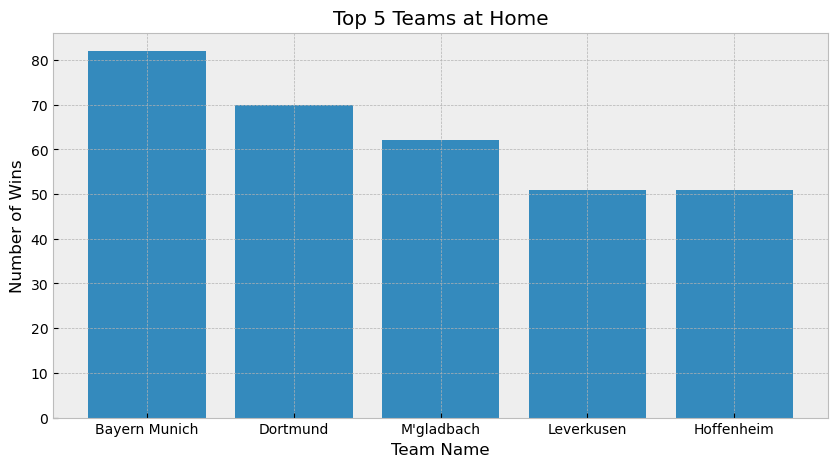

In [14]:
X_label = df.groupby('HomeTeam')['FTR'].apply(lambda x: (x == 'H').sum()).sort_values(ascending=False).head(5).index

plt.figure(figsize=(10,5))

plt.bar(range(5),df.groupby('HomeTeam')['FTR'].apply(lambda x: (x == 'H').sum()).sort_values(ascending=False).head(5))

plt.xticks(np.arange(5),X_label)
plt.title('Top 5 Teams at Home')
plt.xlabel('Team Name')
plt.ylabel('Number of Wins')

Text(0.5, 1.0, 'Top scoring teams at away')

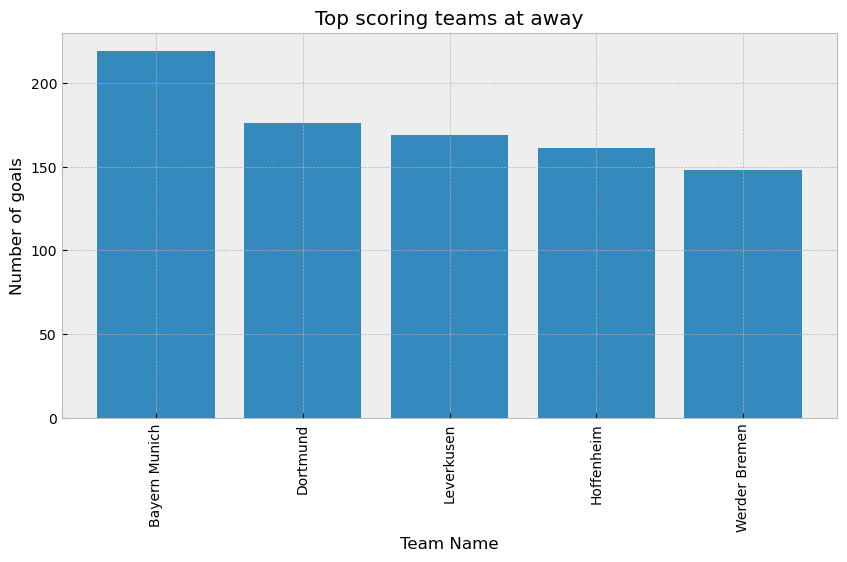

In [15]:
X_label = df.groupby('AwayTeam')['FTAG'].sum().sort_values(ascending=False).head(5).index

plt.figure(figsize=(10,5))

plt.bar(range(5),df.groupby('AwayTeam')['FTAG'].sum().sort_values(ascending=False).head(5))

plt.xticks(np.arange(5),X_label, rotation = 'vertical')
plt.xlabel('Team Name')
plt.ylabel('Number of goals')
plt.title('Top scoring teams at away')

Text(0, 0.5, 'Number of Wins')

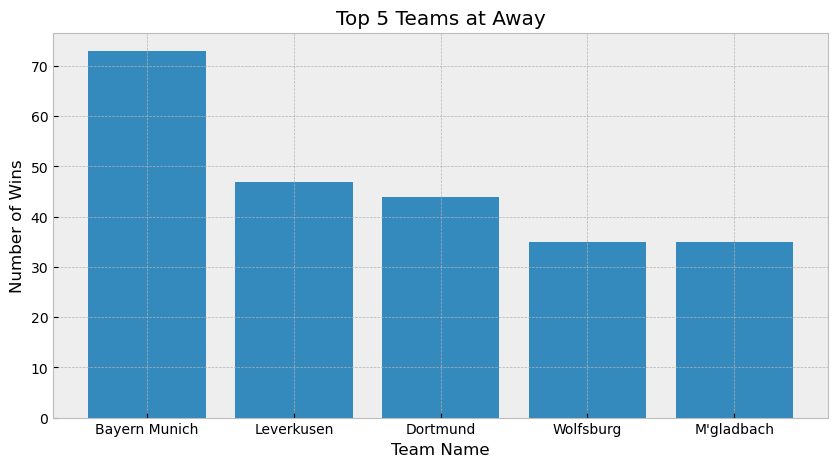

In [16]:
X_label = df.groupby('AwayTeam')['FTR'].apply(lambda x: (x == 'A').sum()).sort_values(ascending=False).head(5).index

plt.figure(figsize=(10,5))

plt.bar(range(5),df.groupby('AwayTeam')['FTR'].apply(lambda x: (x == 'A').sum()).sort_values(ascending=False).head(5))

plt.xticks(np.arange(5),X_label)
plt.title('Top 5 Teams at Away')
plt.xlabel('Team Name')
plt.ylabel('Number of Wins')

**Exploration of the data set.**

<AxesSubplot:xlabel='FTR', ylabel='count'>

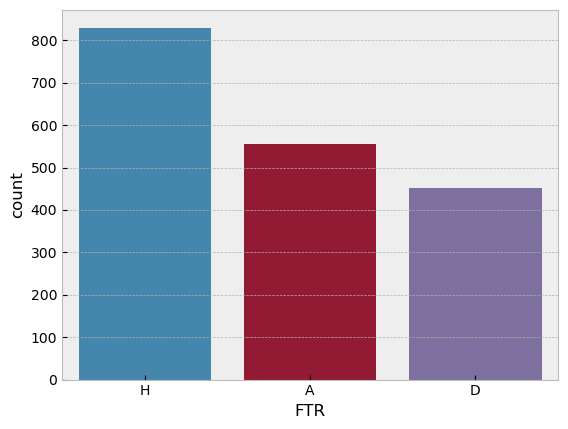

In [17]:
sns.countplot(x='FTR',data=df)

In [18]:
df['FTR'].value_counts()

H    830
A    555
D    451
Name: FTR, dtype: int64

In [19]:
count_H = len(df[df['FTR']=='H'])
count_A = len(df[df['FTR']=='A'])
count_D = len(df[df['FTR']=='D'])

prc_of_H = count_H / (count_H + count_A + count_D)
print("Percentage of home wins is:",round(prc_of_H*100,2),"%")

prc_of_A = count_A / (count_H + count_A + count_D)
print("Percentage of away wins is:",round(prc_of_A*100,2),"%")

prc_of_D = count_D / (count_H + count_A + count_D)
print("Percentage of draws is:",round(prc_of_D*100,2),"%")

Percentage of home wins is: 45.21 %
Percentage of away wins is: 30.23 %
Percentage of draws is: 24.56 %


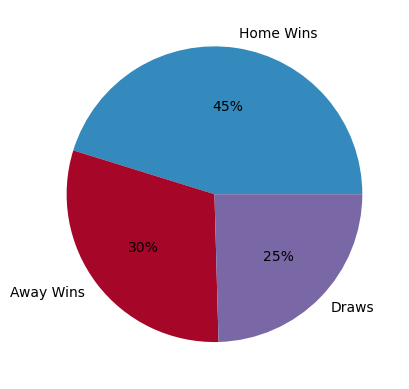

In [20]:
data = [45.21, 30.23, 24.56]
labels = ['Home Wins', 'Away Wins', 'Draws']

plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

**We are going to see the distribution of some important variables**

Text(0.5, 0, 'Half Time Home Goals')

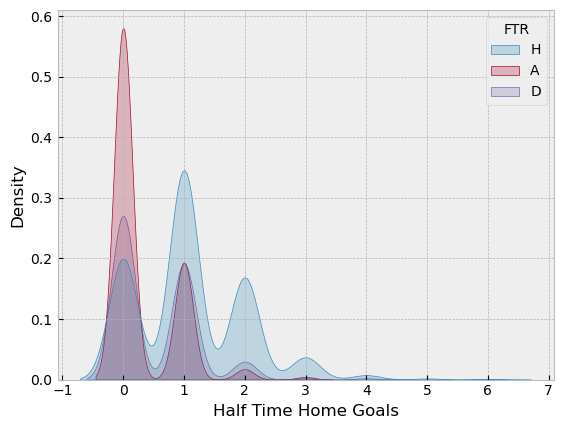

In [21]:
sns.kdeplot(data=df, x='HTHG', hue='FTR',fill=True)

plt.xlabel('Half Time Home Goals')

Text(0.5, 0, 'Half Time Home Goals')

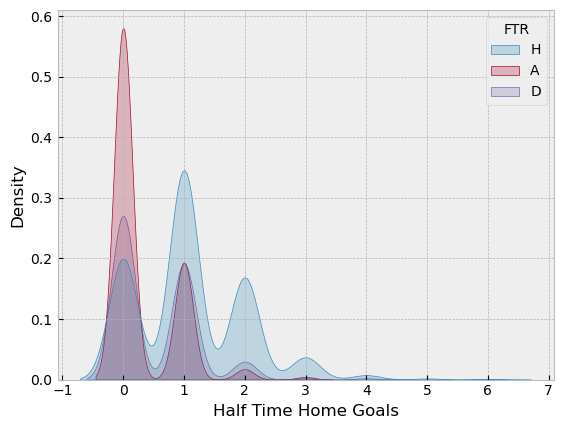

In [22]:
sns.kdeplot(data=df, x='HTHG', hue='FTR',fill=True)

plt.xlabel('Half Time Home Goals')

Text(0.5, 0, 'Average Home Win Odds')

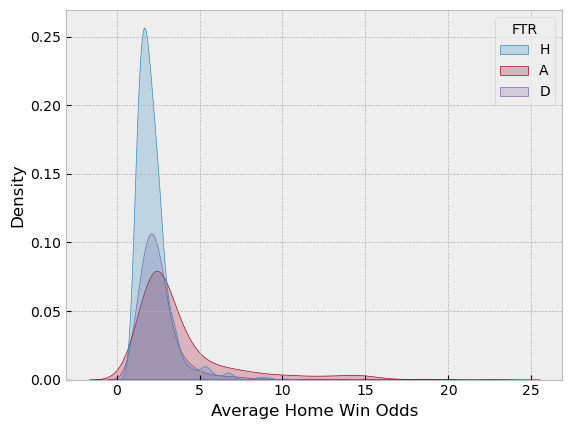

In [23]:
sns.kdeplot(data=df, x='AVGH', hue='FTR',fill=True)

plt.xlabel('Average Home Win Odds')

Text(0.5, 0, 'Average Draw Odds')

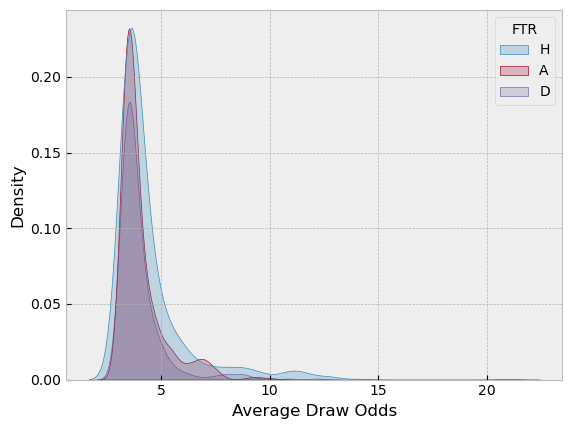

In [24]:
sns.kdeplot(data=df, x='AVGD', hue='FTR', fill=True)

plt.xlabel('Average Draw Odds')

Text(0.5, 0, 'Average Away Win Odds')

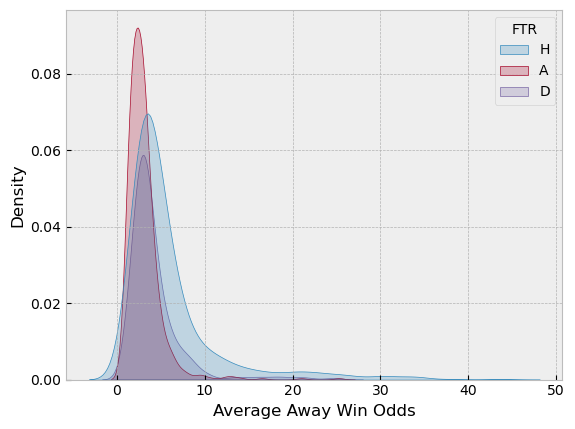

In [25]:
sns.kdeplot(data=df, x='AVGA',hue='FTR', fill=True)

plt.xlabel('Average Away Win Odds')

Text(0.5, 0, 'Home xGoals')

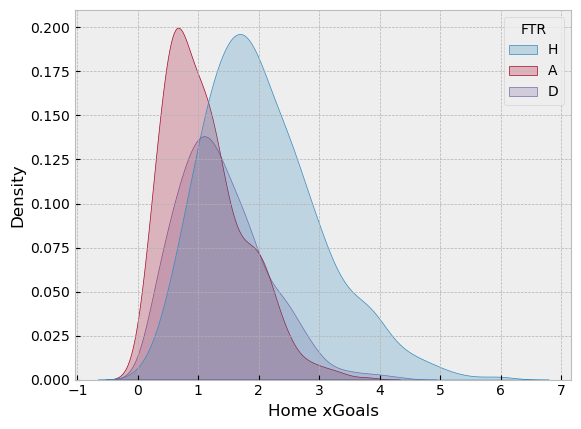

In [26]:
sns.kdeplot(data=df, x='HxG',hue='FTR', fill=True)

plt.xlabel('Home xGoals')

Text(0.5, 0, 'Away xGoals')

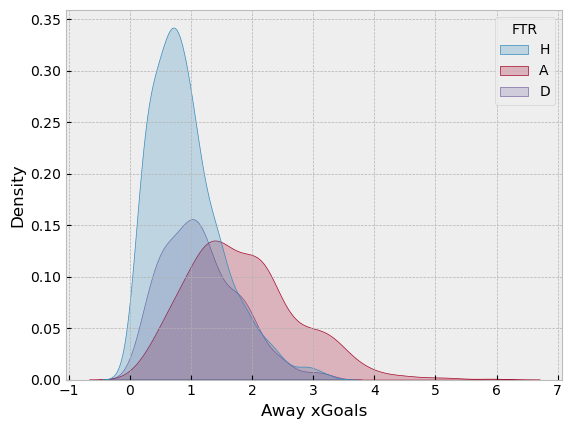

In [27]:
sns.kdeplot(data=df, x='AxG',hue='FTR', fill=True)

plt.xlabel('Away xGoals')

Text(0.5, 0, 'Home Deep')

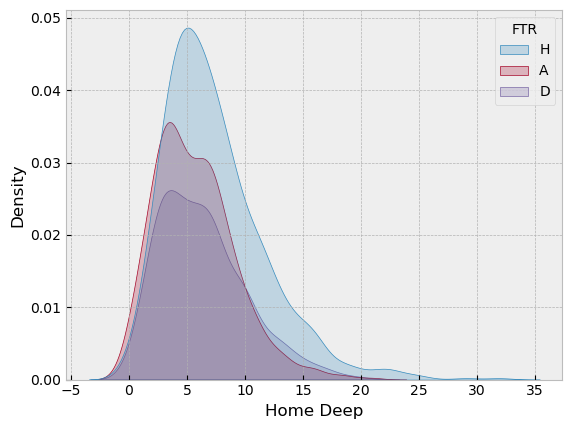

In [28]:
sns.kdeplot(data=df, x='Hdeep',hue='FTR', fill=True)

plt.xlabel('Home Deep')

Text(0.5, 0, 'Away Deep')

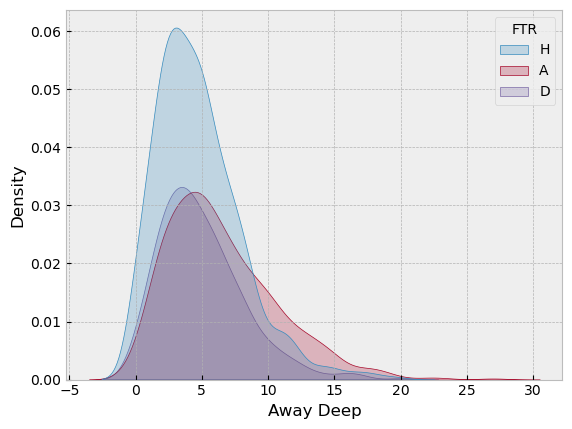

In [29]:
sns.kdeplot(data=df, x='Adeep',hue='FTR', fill=True)

plt.xlabel('Away Deep')

Text(0.5, 0, 'Home Team Power of Pressure')

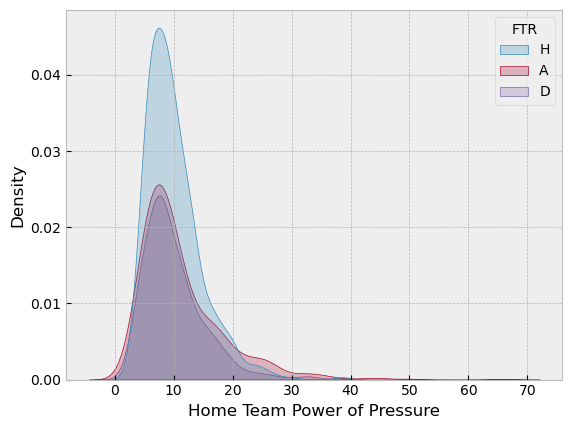

In [30]:
sns.kdeplot(data=df, x='Hppda_coef',hue='FTR', fill=True)

plt.xlabel('Home Team Power of Pressure')

Text(0.5, 0, 'Away Team Power of Pressure')

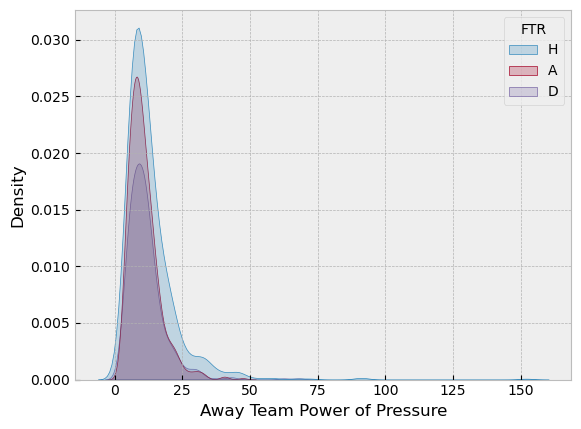

In [31]:
sns.kdeplot(data=df, x='Appda_coef',hue='FTR', fill=True)

plt.xlabel('Away Team Power of Pressure')

Text(0.5, 0, 'Full Time Home Team Goals')

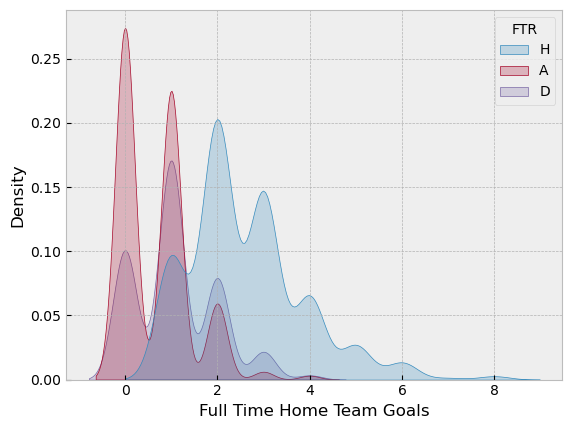

In [32]:
sns.kdeplot(data=df, x='FTHG',hue='FTR', fill=True)

plt.xlabel('Full Time Home Team Goals')

Text(0.5, 0, 'Full Time Away Team Goals')

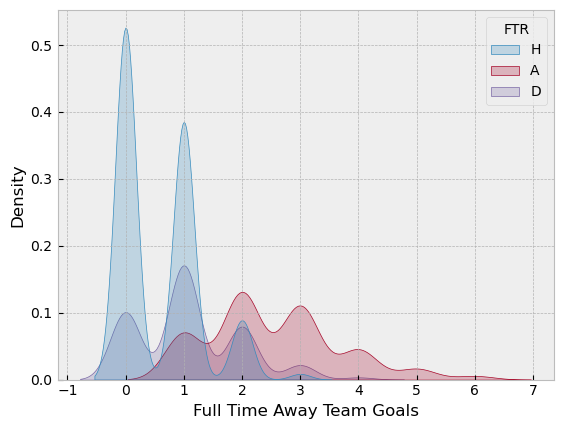

In [33]:
sns.kdeplot(data=df, x='FTAG',hue='FTR', fill=True)

plt.xlabel('Full Time Away Team Goals')

Text(0.5, 0, 'Full Time Home Shots on Target')

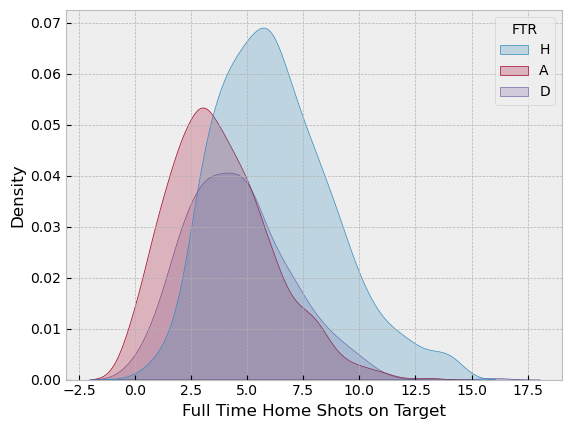

In [34]:
sns.kdeplot(data=df, x='HST',hue='FTR', fill=True)

plt.xlabel('Full Time Home Shots on Target')

Text(0.5, 0, 'Full Time Away Shots on Target')

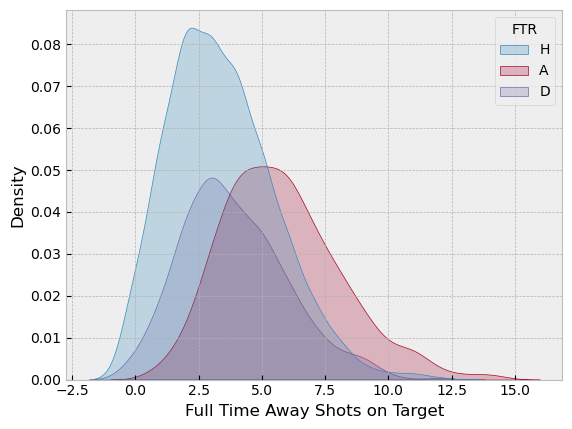

In [35]:
sns.kdeplot(data=df, x='AST',hue='FTR', fill=True)

plt.xlabel('Full Time Away Shots on Target')

Text(0.5, 0, 'Home Team Corners')

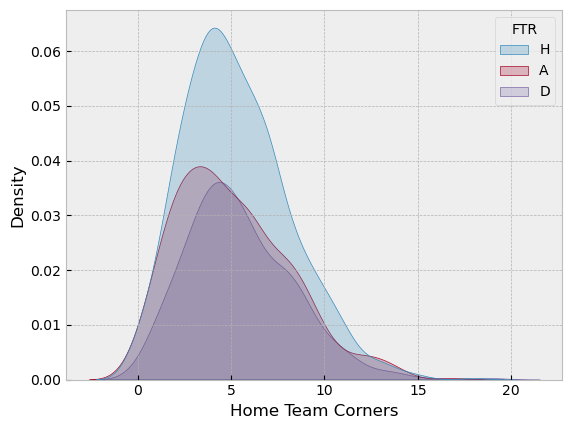

In [36]:
sns.kdeplot(data=df, x='HC',hue='FTR', fill=True)

plt.xlabel('Home Team Corners')

Text(0.5, 0, 'Away Team Corners')

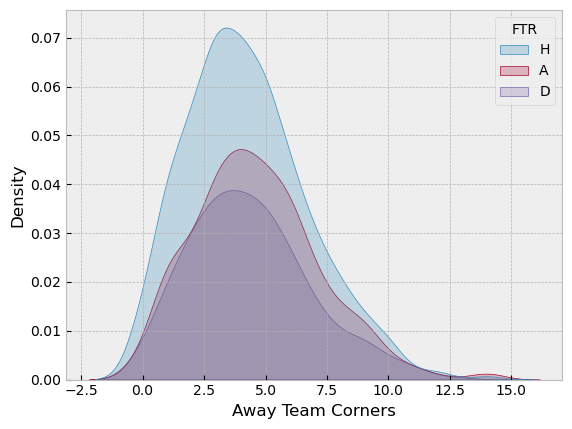

In [37]:
sns.kdeplot(data=df, x='AC',hue='FTR', fill=True)

plt.xlabel('Away Team Corners')

**Now we are going to check how some variables interact with each other.**

<AxesSubplot:>

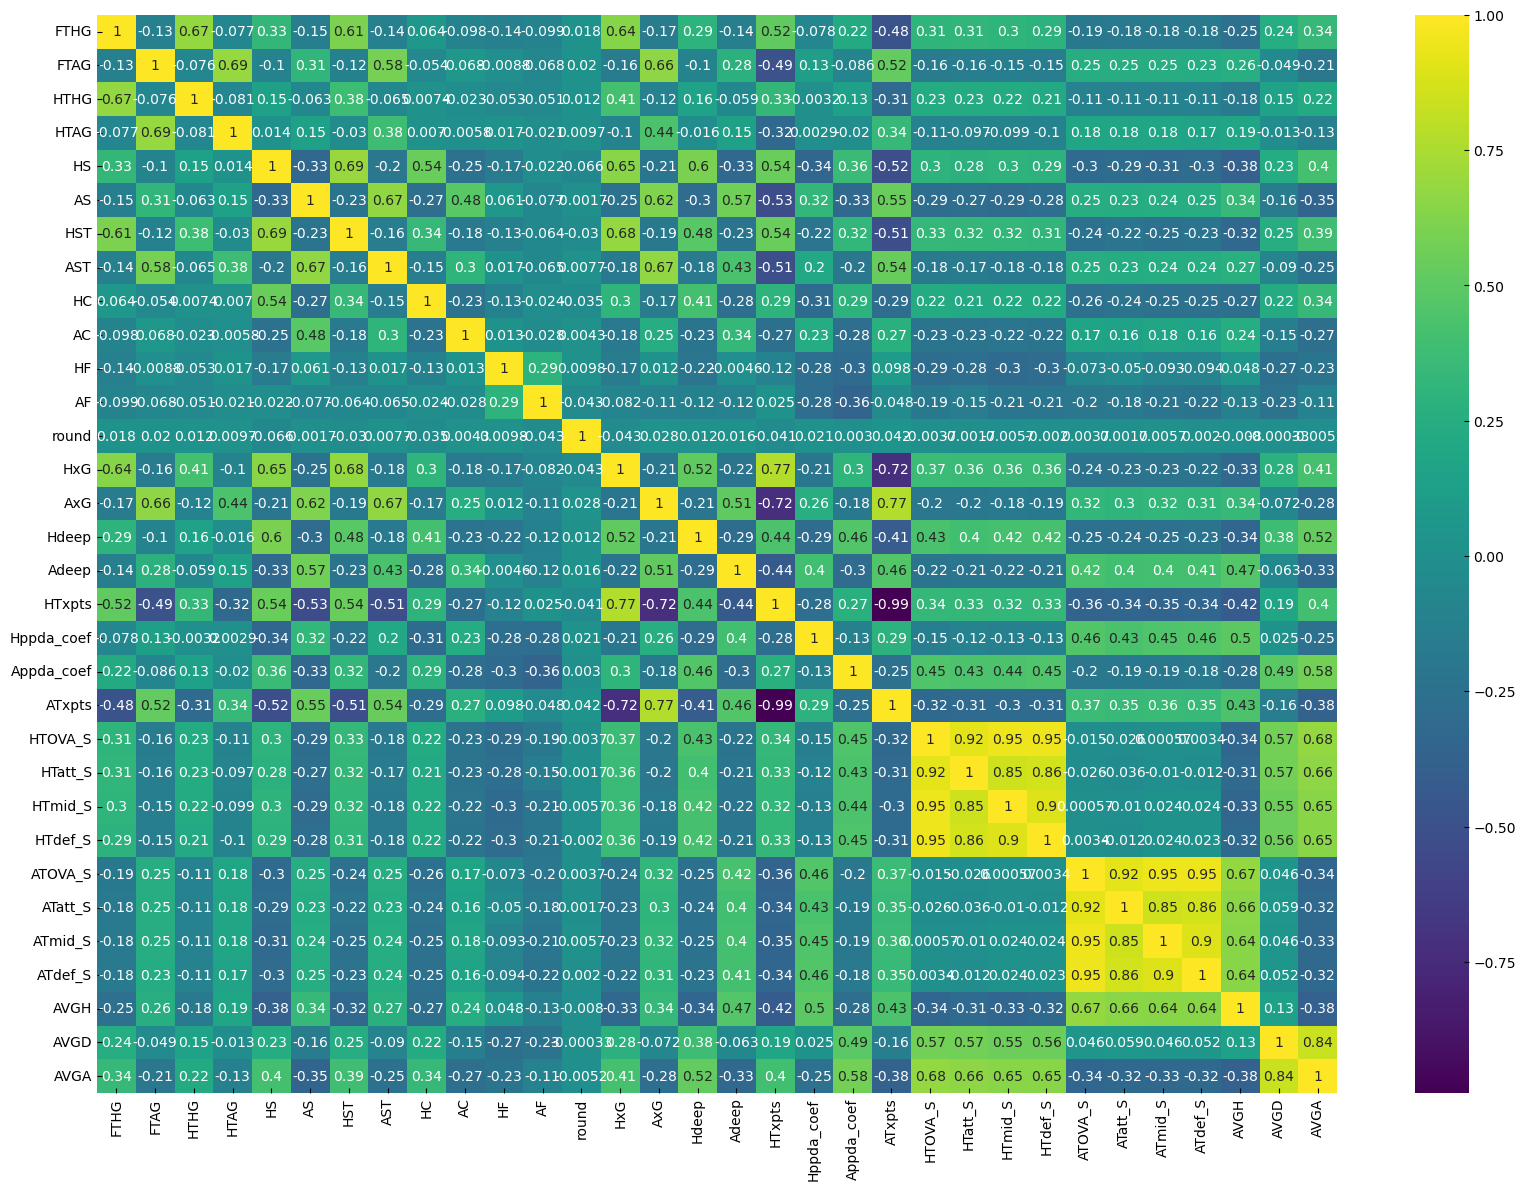

In [38]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),annot=True, cmap='viridis')

Text(0, 0.5, 'Half Time Away Goals')

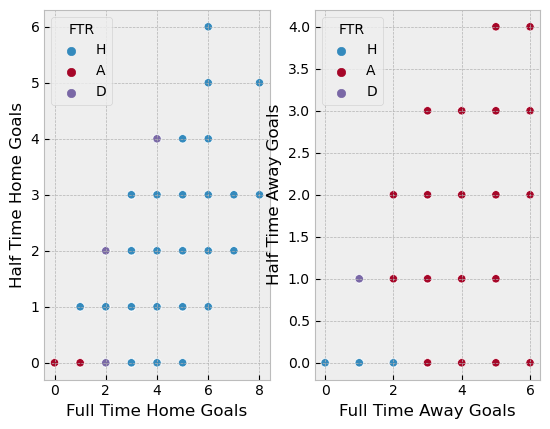

In [39]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='FTHG', y='HTHG', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Full Time Home Goals')
axes[0].set_ylabel('Half Time Home Goals')

sns.scatterplot(x='FTAG', y='HTAG', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Full Time Away Goals')
axes[1].set_ylabel('Half Time Away Goals')

- **"FTHG" and "HTHG" have strong positive correlation.** That makes sense cause goals at the half time means that the team has scored goals in the game.

- The interesting part of the graph is that when the home team scores 0 or 1 goal it usually losses the game.

- We observe the same behavior between the variable "FTAG" and "HTAG".

Text(0, 0.5, 'Away Team Shots on Target')

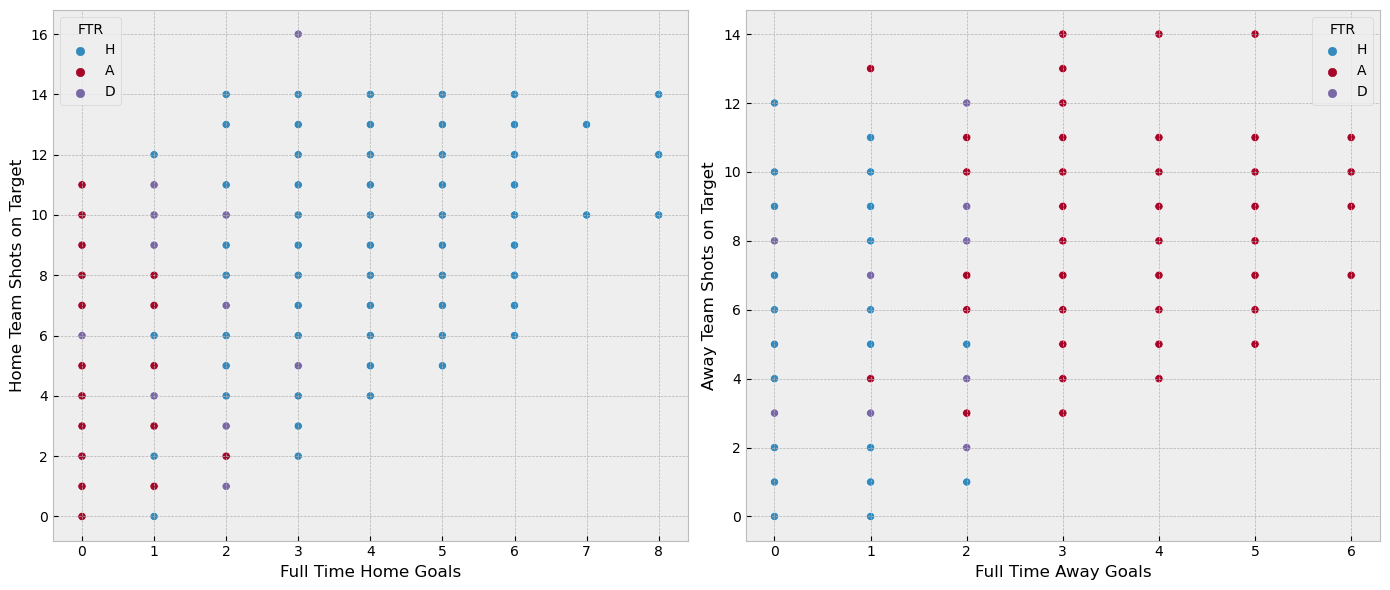

In [40]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='FTHG', y='HST', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Full Time Home Goals')
axes[0].set_ylabel('Home Team Shots on Target')

sns.scatterplot(x='FTAG', y='AST', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Full Time Away Goals')
axes[1].set_ylabel('Away Team Shots on Target')

As we can see from the graph the two variables have strong positive correlation. That makes sense cause a team must create chances in order to score a goal.

Text(0, 0.5, 'Away Team xGoals')

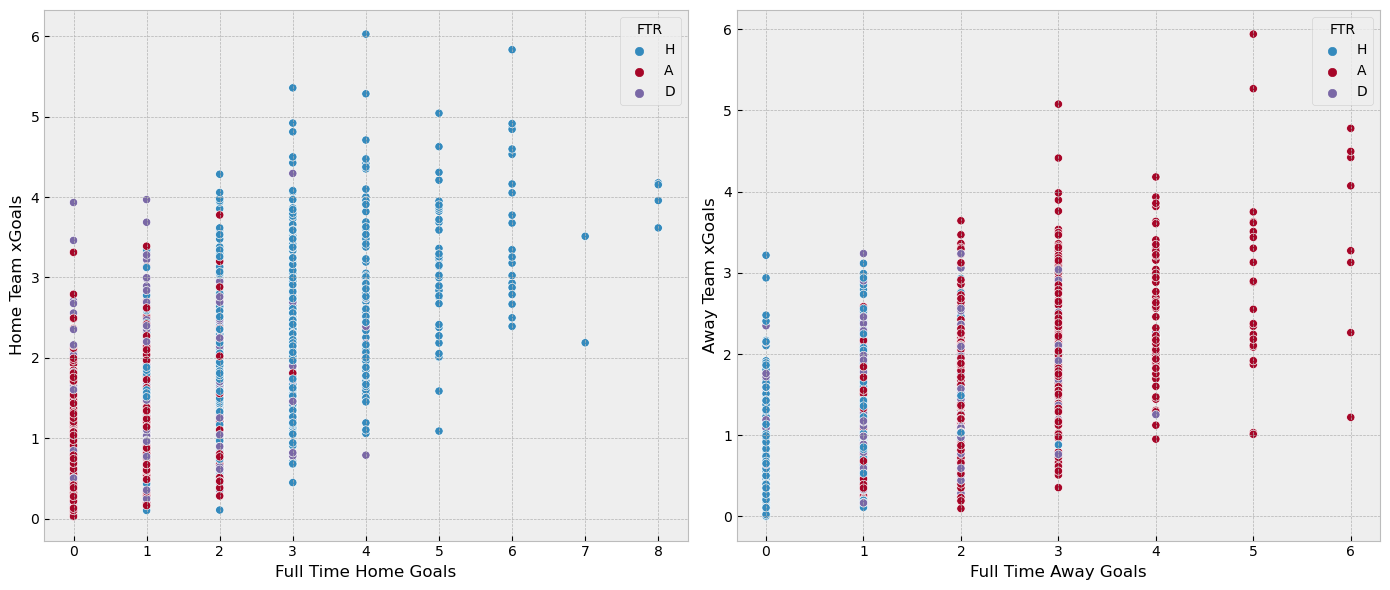

In [41]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='FTHG', y='HxG', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Full Time Home Goals')
axes[0].set_ylabel('Home Team xGoals')

sns.scatterplot(x='FTAG', y='AxG', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Full Time Away Goals')
axes[1].set_ylabel('Away Team xGoals')

Expected goals (or xG) measures the quality of a chance by calculating the likelihood that it will be scored from a particular position on the pitch during a particular phase of play. **So the higher the indicator of xG the more possible is for the team to score goals.**

<AxesSubplot:xlabel='HS', ylabel='AS'>

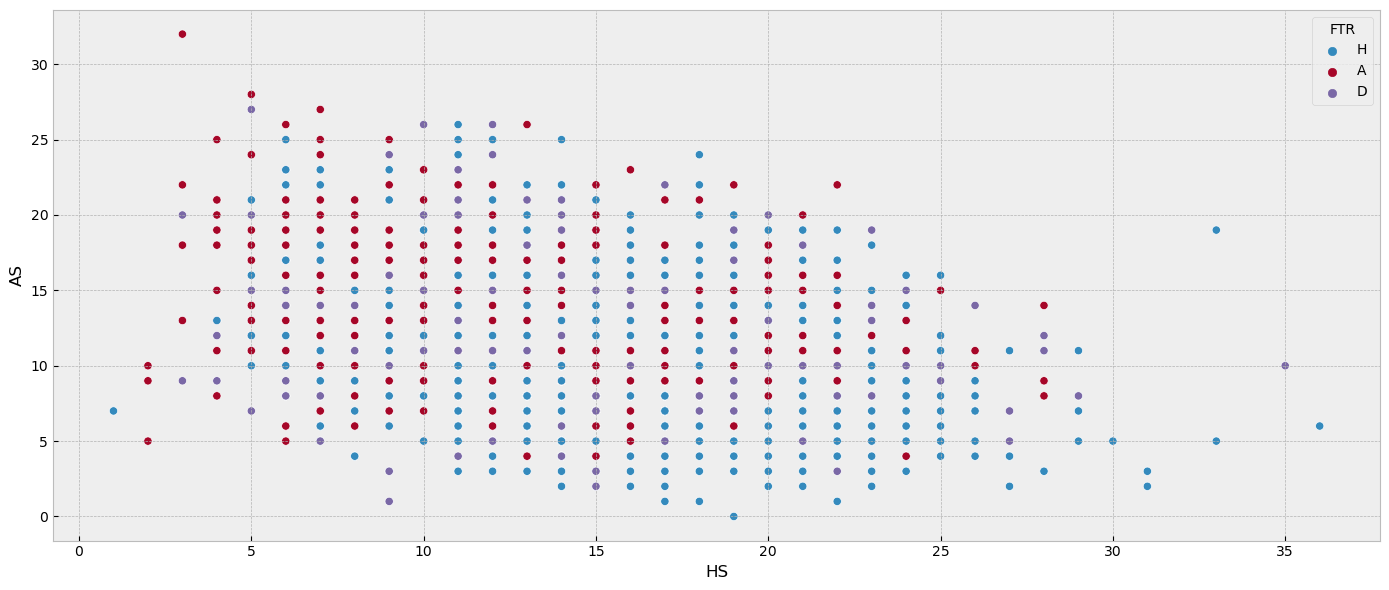

In [42]:
sns.scatterplot(x='HS',y='AS', data=df,hue='FTR')

- It make sense for **HS** and **AS** to have moderate negative correlation. When one of the two teams create more chances it probably has more possesion of the ball throughout the game so the other team create less chances.

- When it comes to predicting the game outcome, we can not actually make an insight.

Text(0, 0.5, 'Away Team Shots on Target')

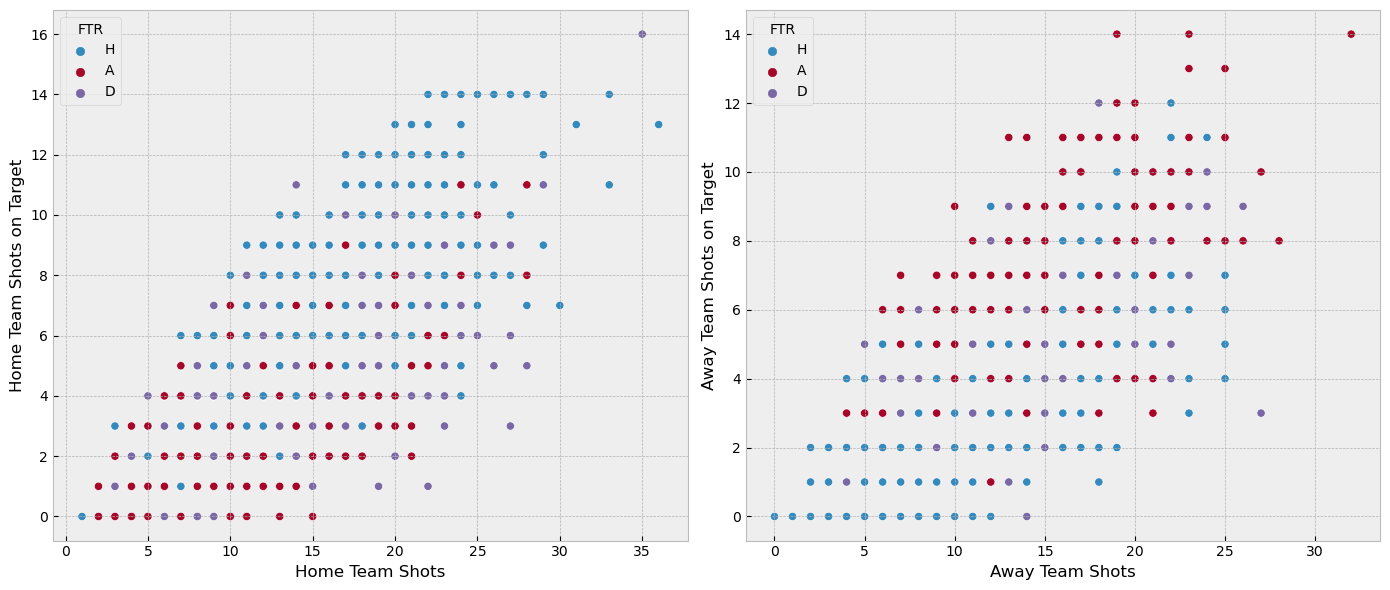

In [43]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='HS', y='HST', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Home Team Shots')
axes[0].set_ylabel('Home Team Shots on Target')

sns.scatterplot(x='AS', y='AST', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Away Team Shots')
axes[1].set_ylabel('Away Team Shots on Target')

The more shots a team does the more possible is for the ball to find the target. That explains the **strong positive correlation** between the two variables.

Text(0, 0.5, 'Away Team Corners')

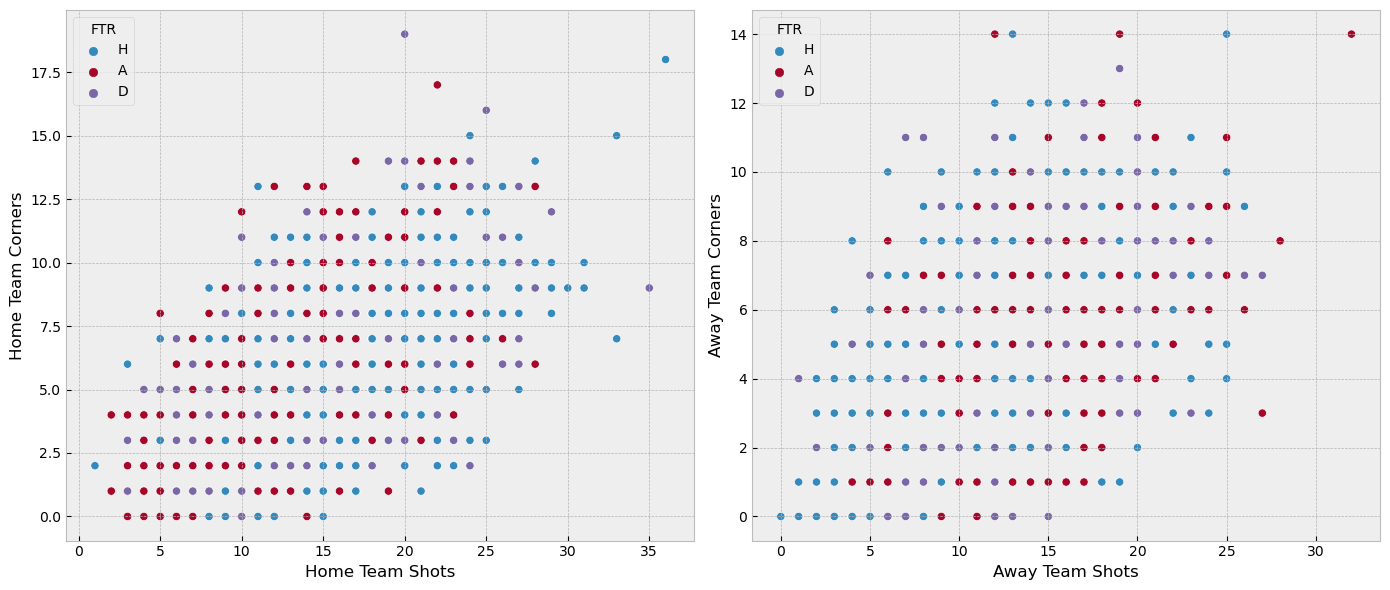

In [44]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='HS', y='HC', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Home Team Shots')
axes[0].set_ylabel('Home Team Corners')

sns.scatterplot(x='AS', y='AC', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Away Team Shots')
axes[1].set_ylabel('Away Team Corners')

When a team creates a lot of chances it is highly possible that this team will be awarded a corner. That explains the **moderate positive correlation** that these two variables have.



Text(0, 0.5, 'Away Team xG')

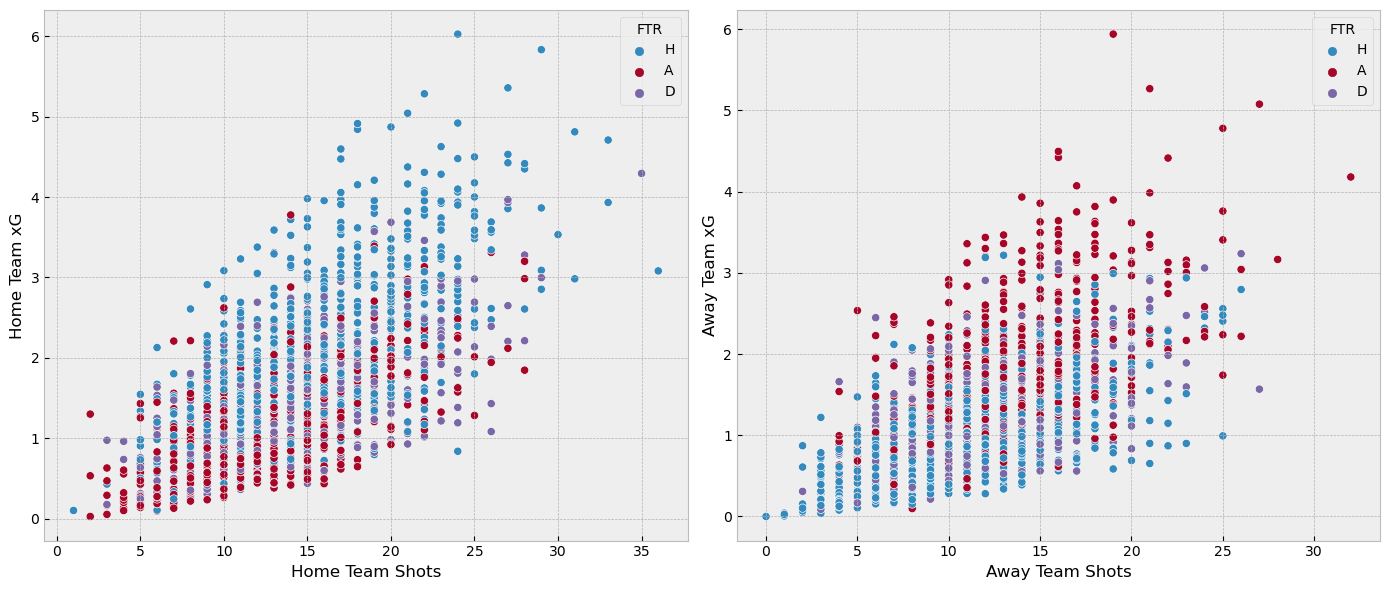

In [45]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='HS', y='HxG', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Home Team Shots')
axes[0].set_ylabel('Home Team xG')

sns.scatterplot(x='AS', y='AxG', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Away Team Shots')
axes[1].set_ylabel('Away Team xG')

- A team that does high number of shots per game, is more possible to create high quality goalscoring opportunities. 

- An interesting insight from these two graphs is that when the xGoal indicator of team is high it is more possible that this team is going to win. **Expected goals seems to be a good factor to take into account when you want to predict a football match outcome.**  

Text(0, 0.5, 'Away Team deep')

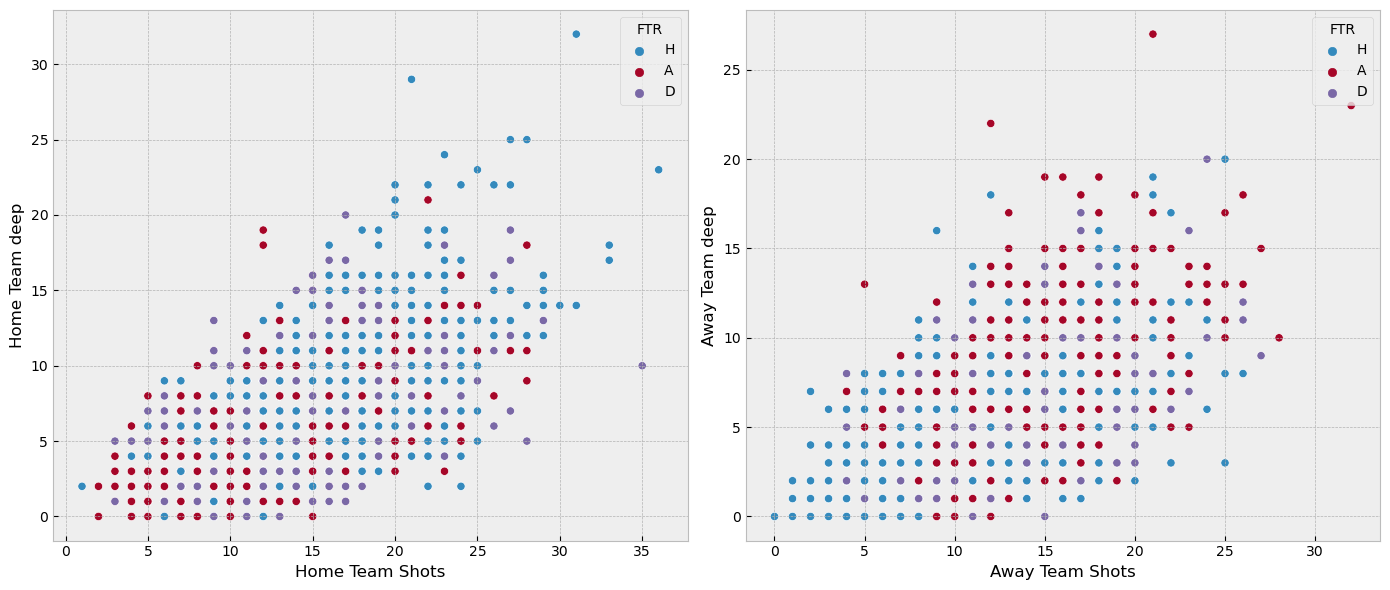

In [46]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='HS', y='Hdeep', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Home Team Shots')
axes[0].set_ylabel('Home Team deep')

sns.scatterplot(x='AS', y='Adeep', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Away Team Shots')
axes[1].set_ylabel('Away Team deep')

- Passes that are completed by a team within an estimated 20 yards of goal are probably going to lead to shots. That explains the strong positive correlation between the variables.

- When it comes to the prediction of the football match outcomes **Deep** alone cannot add up to the possible outcome, but if we combine it with other factors like **xG** it is going to be really helpfull.

Text(0, 0.5, 'Average Away Win Odds')

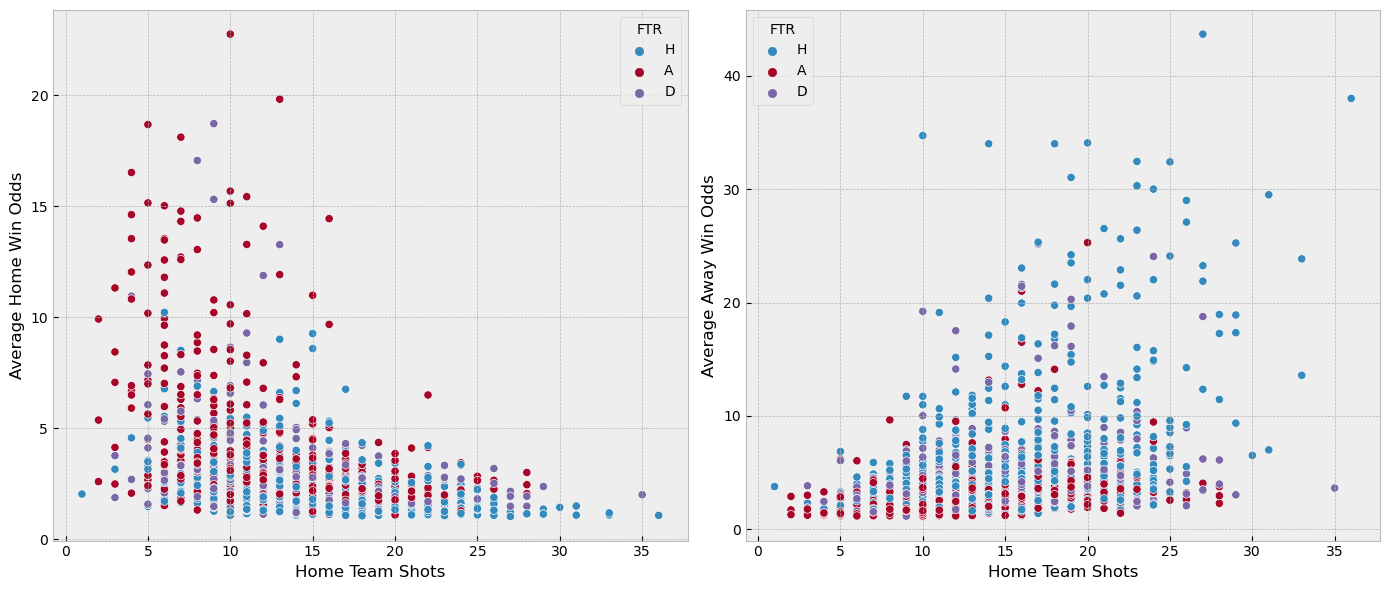

In [47]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='HS', y='AVGH', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Home Team Shots')
axes[0].set_ylabel('Average Home Win Odds')

sns.scatterplot(x='HS', y='AVGA', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Home Team Shots')
axes[1].set_ylabel('Average Away Win Odds')

- Low values of win odds indicate that the home team is favorite to win. The lower the value of the odds the stronger the home team, so the possibility of this team to create a high number of chances is higher.

- The same thing happens with the away win odds. The lower the away win odds are the less possible for the home team is to create a lot of chances. But as the value of the odds is getting higher the home team probably will create more chances.

Text(0, 0.5, 'Average Home Win Odds')

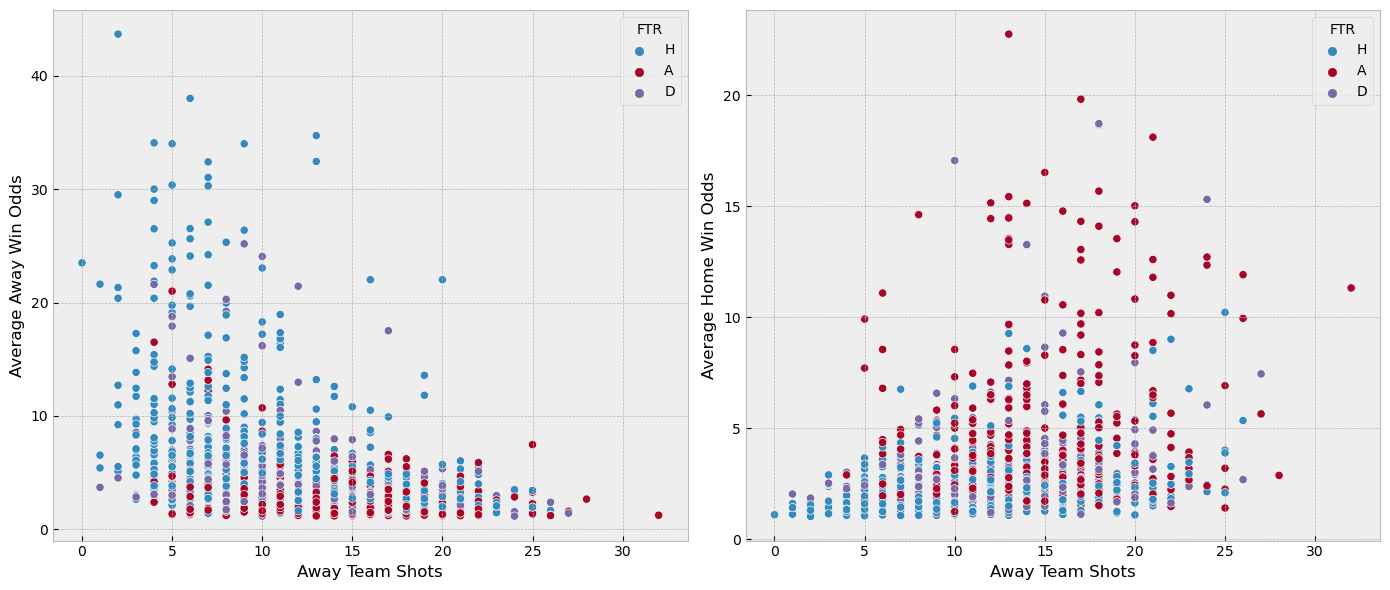

In [48]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='AS', y='AVGA', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Away Team Shots')
axes[0].set_ylabel('Average Away Win Odds')

sns.scatterplot(x='AS', y='AVGH', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Away Team Shots')
axes[1].set_ylabel('Average Home Win Odds')

We observe the same behavior that "HS" has with the odds.

Text(0, 0.5, 'Away Team xG')

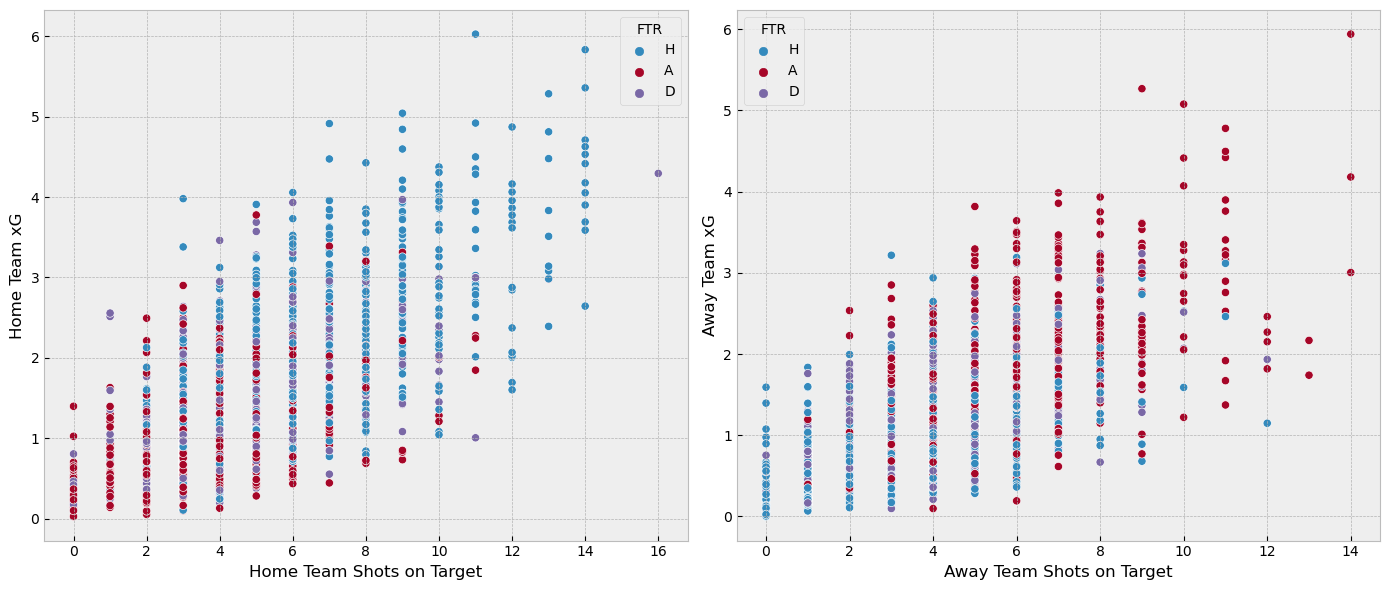

In [49]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='HST', y='HxG', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Home Team Shots on Target')
axes[0].set_ylabel('Home Team xG')

sns.scatterplot(x='AST', y='AxG', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Away Team Shots on Target')
axes[1].set_ylabel('Away Team xG')

A team that does high number of shots per game that are on target is going to create high quality goalscoring opportunities. That is the reason that these two variable have **strong positive correlation**.

Text(0, 0.5, 'Away Team deep')

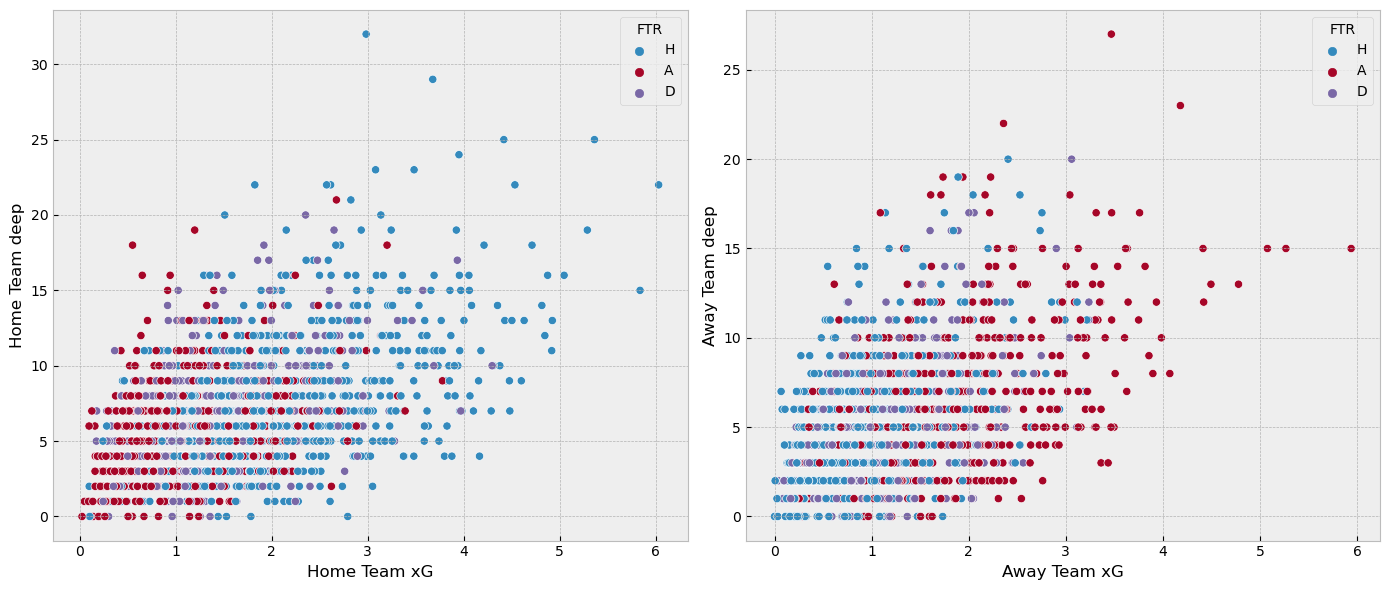

In [50]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='HxG', y='Hdeep', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Home Team xG')
axes[0].set_ylabel('Home Team deep')

sns.scatterplot(x='AxG', y='Adeep', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Away Team xG')
axes[1].set_ylabel('Away Team deep')

- A team that manages to complete passes within a 20 yard from goal it is highly possible that it is going to create high quality goalscoring opportunities.

- From the two graphs we observe that as these two factors are increasing the outcome of the match seems to be more distinct.

Text(0, 0.5, 'Average Away Win Odds')

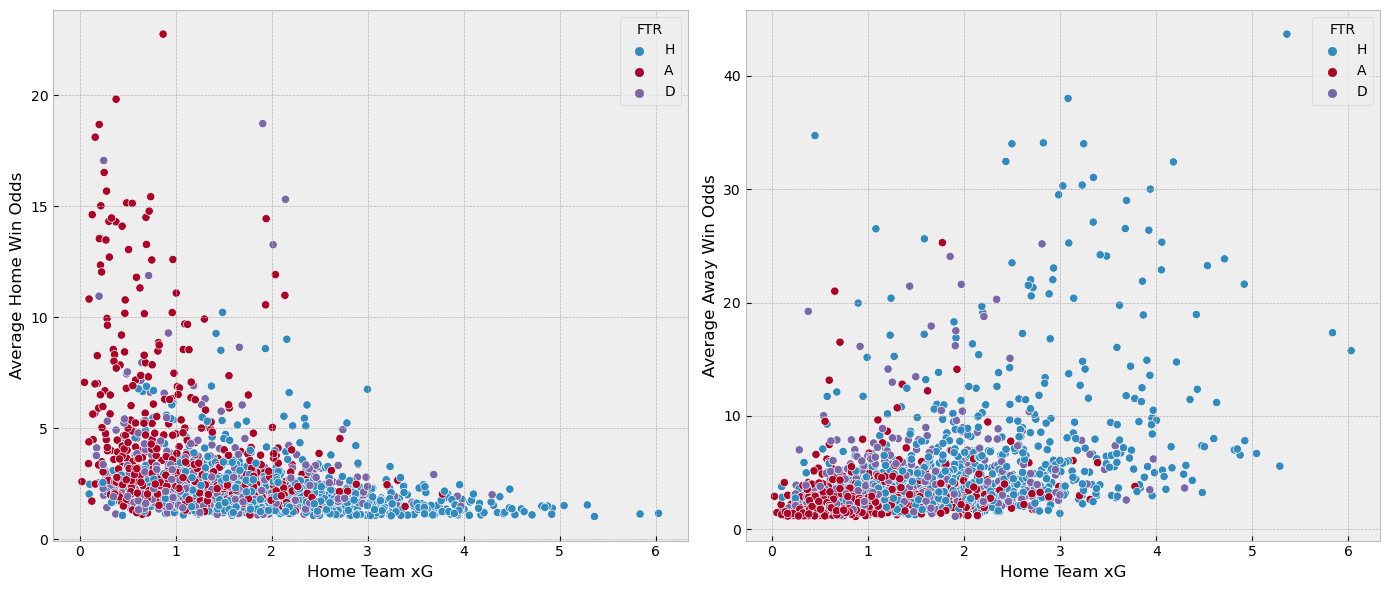

In [51]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='HxG', y='AVGH', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Home Team xG')
axes[0].set_ylabel('Average Home Win Odds')

sns.scatterplot(x='HxG', y='AVGA', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Home Team xG')
axes[1].set_ylabel('Average Away Win Odds')

- From the first graph we can see that when the home team xG has low prices the average home win odds are usually high. That probably has to do with the dynamics of the two teams. When the home team creates more high quality goal usually the home win odds are low.

-  From the second graph we can see that when the home team xG has low prices the average away win odds are usually low. That probably has to do with the dynamics of the two teams. When the home team creates more high quality goal usually the away win odds are high.

Text(0, 0.5, 'Average Away Win Odds')

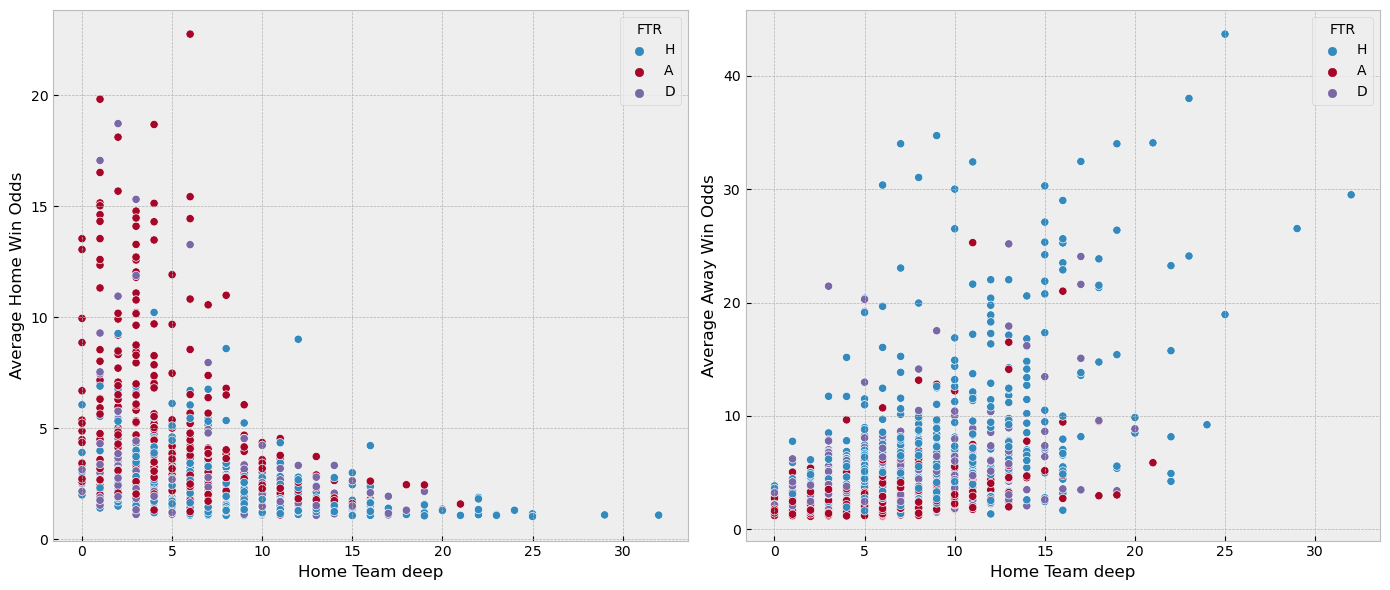

In [52]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='Hdeep', y='AVGH', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Home Team deep')
axes[0].set_ylabel('Average Home Win Odds')

sns.scatterplot(x='Hdeep', y='AVGA', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Home Team deep')
axes[1].set_ylabel('Average Away Win Odds')

- The team that manage to completes a lot of passes within 20 yards from goal usuallly is the favorite to win the game. That is the reason that the average home win odds are getting higher as the **"deep"** factor is getting lower.

- The exact opposite happens between the **"deep"** factor and **the average away win odds.**

We expect the same behaviour between the away team **"deep"** and the game odds.

Text(0, 0.5, 'Average Away Win Odds')

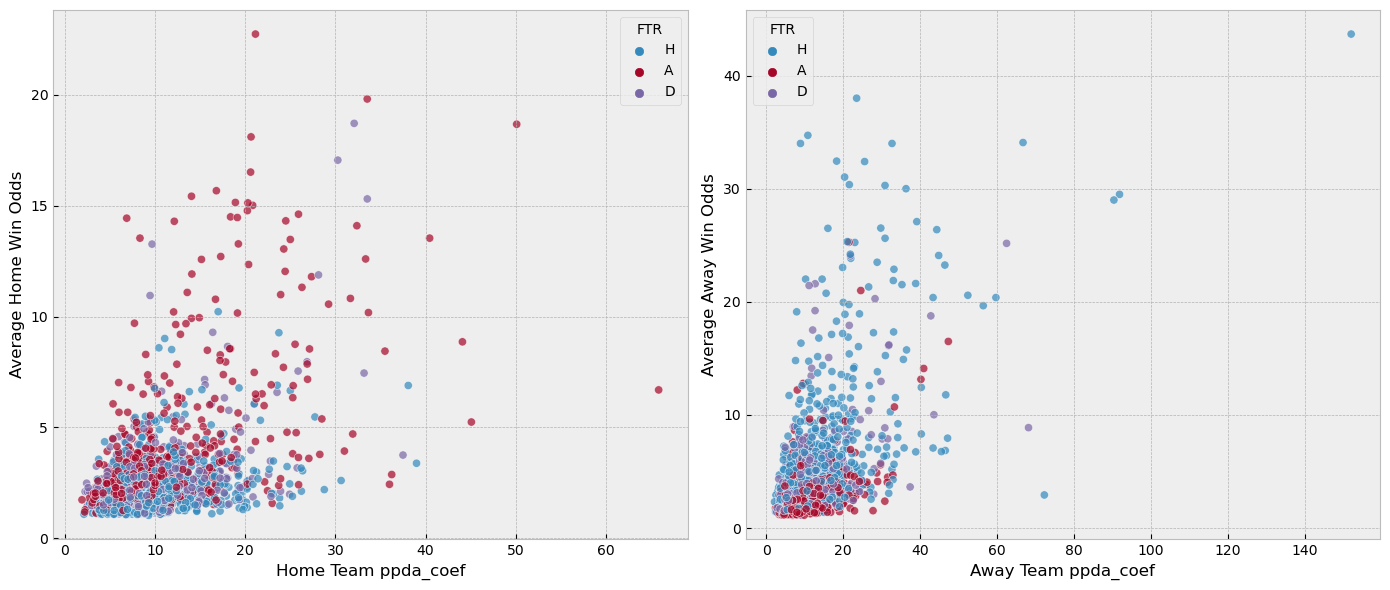

In [53]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='Hppda_coef', y='AVGH', data=df,hue='FTR',alpha=0.7, ax=axes[0])
axes[0].set_xlabel('Home Team ppda_coef')
axes[0].set_ylabel('Average Home Win Odds')

sns.scatterplot(x='Appda_coef', y='AVGA', data=df,hue='FTR',alpha=0.7, ax=axes[1])
axes[1].set_xlabel('Away Team ppda_coef')
axes[1].set_ylabel('Average Away Win Odds')

A team that lets its opponent to build up the game with ease it is more possible to concede a goal. That is the main reason that if the deep factor is getting higher then the team's winning odds are also getting higher.

Text(0, 0.5, 'Average Away Win Odds')

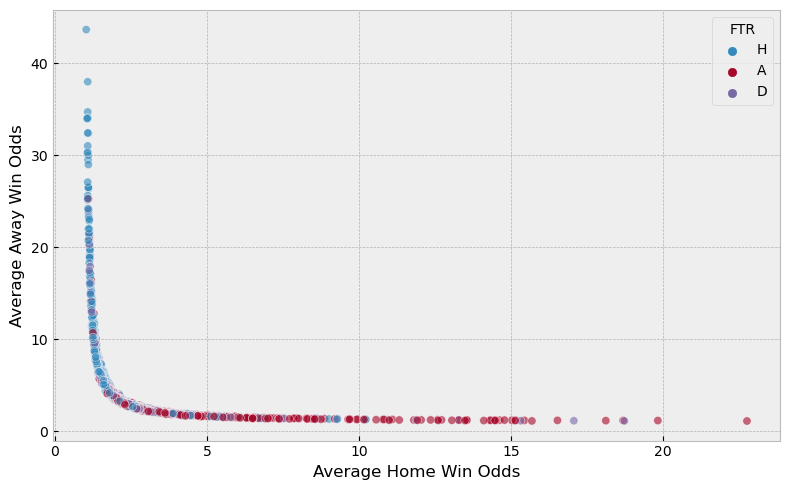

In [54]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'AVGH', y='AVGA', data=df, hue='FTR', alpha=0.6)

plt.xlabel("Average Home Win Odds")
plt.ylabel("Average Away Win Odds")

- **The two odds have moderate negative correlation**. It is something that we have anticipated cause the winning odds are based on the dynamics of home and away team.

- When the average home win odd is low and the average away win odd is high we can see that most of the times the result is going to be home win. When the odds are quite balanced the prediction of the match is a bit harder, because as we can see the outcome of the match could also be a draw or an away win. When the home win odds are high and the away win odds are low we can see that the outcome of the game probably is going to be away win but there are also a lot of cases that the result is draw. We can clearly see that the two odds a relatively negative correlated.

Text(0, 0.5, 'Away team expected goals')

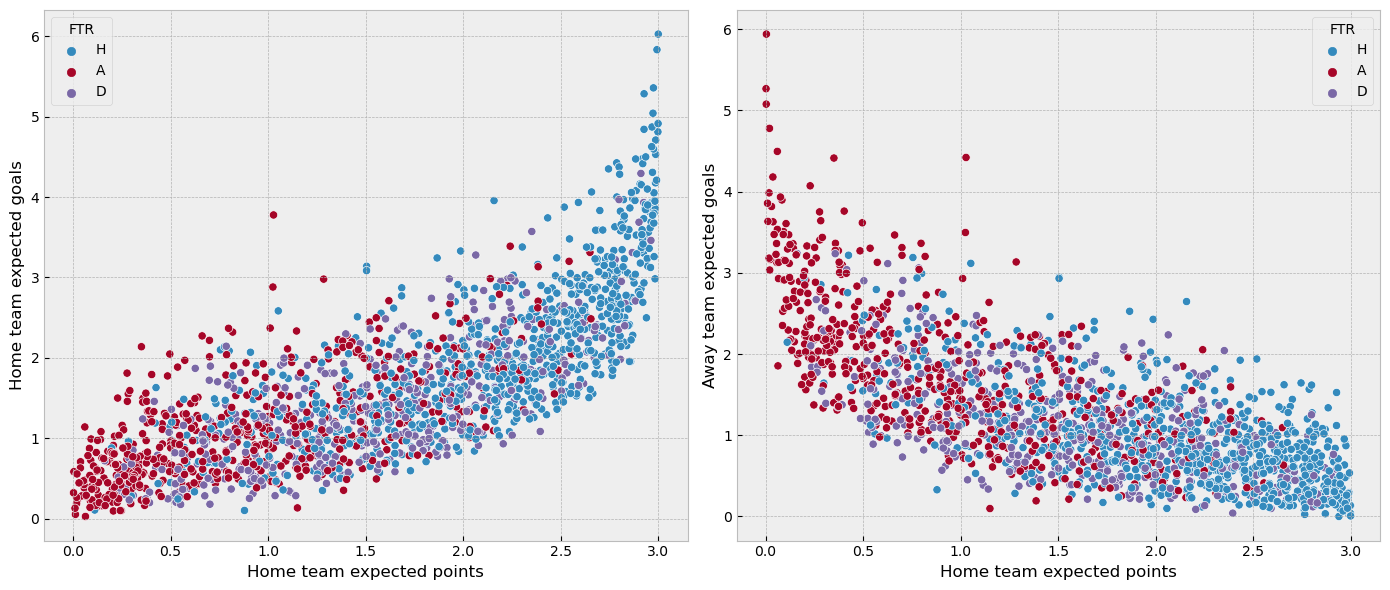

In [56]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='HTxpts', y='HxG', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Home team expected points')
axes[0].set_ylabel('Home team expected goals')

sns.scatterplot(x='HTxpts', y='AxG', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Home team expected points')
axes[1].set_ylabel('Away team expected goals')

The two variable are highly correlated. Higher values of expected points for the home team usually lead to higher values of expected goals for the same team and lower for the opponent. Τhe same behaviour has the variable "ATxpts" with "HXG" and "AxG".

Text(0, 0.5, 'Away Team expected points')

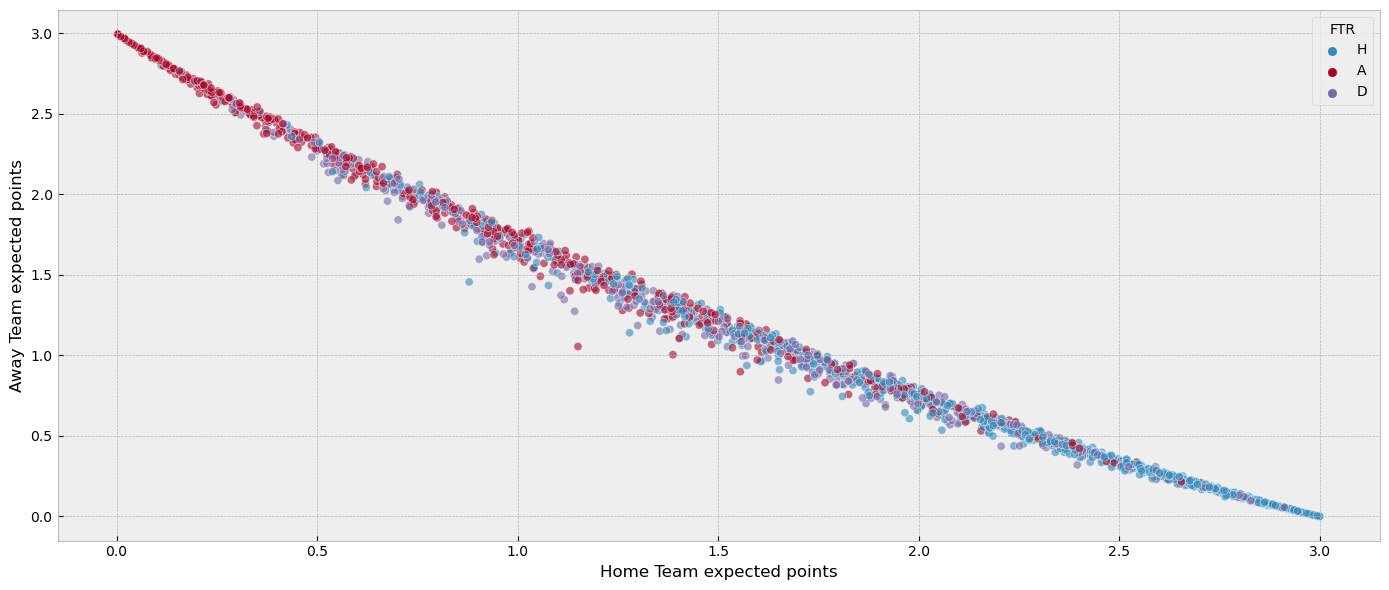

In [58]:

sns.scatterplot(x= 'HTxpts', y='ATxpts', data=df, hue='FTR', alpha=0.6)

plt.xlabel("Home Team expected points")
plt.ylabel("Away Team expected points")


The expected points for home and away team have strong negative correlations.

**From the correaltion matrix we can see that the different ratings of the teams are highly correlated. We have to drop some of these features in order to lower the noise.** We can also see from the correlation matrix that team rating is taken into consideration when the bookies formulating the odds for the game.

Text(0, 0.5, 'Average Away Win Odds')

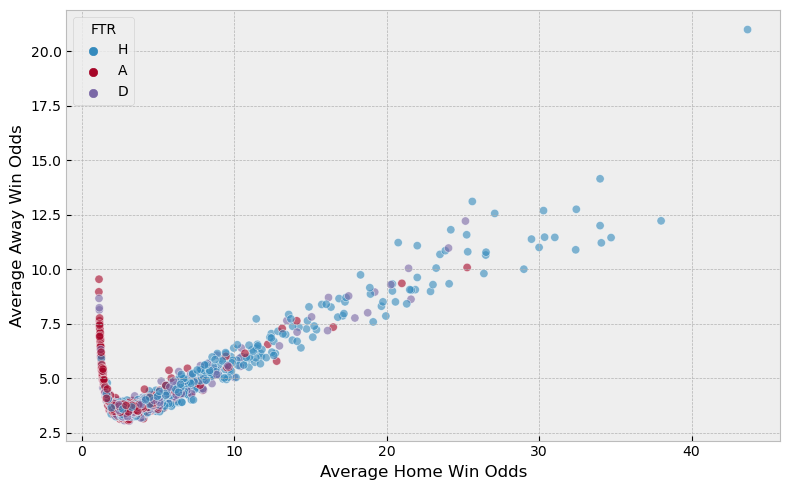

In [55]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'AVGA', y='AVGD', data=df, hue='FTR', alpha=0.6)

plt.xlabel("Average Home Win Odds")
plt.ylabel("Average Away Win Odds")

Text(0, 0.5, 'Average Away Win Odds')

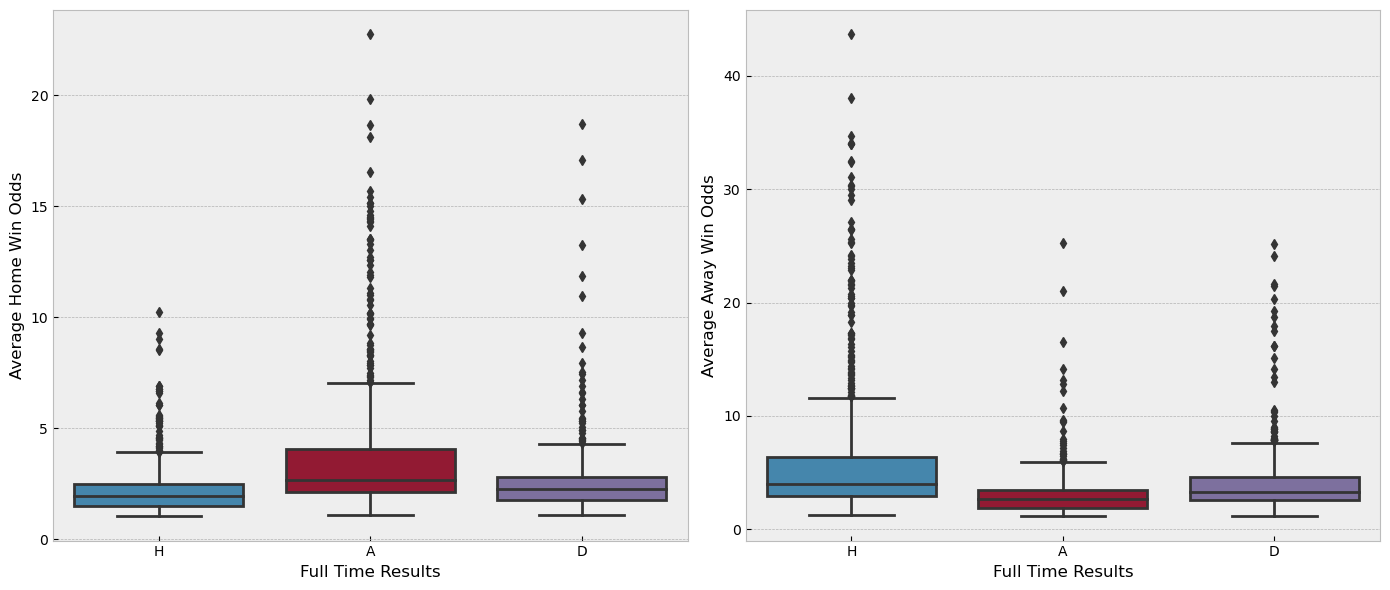

In [55]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.boxplot(x='FTR', y='AVGH', data=df, ax=axes[0])
axes[0].set_xlabel('Full Time Results')
axes[0].set_ylabel('Average Home Win Odds')

sns.boxplot(x='FTR', y='AVGA', data=df, ax=axes[1])
axes[1].set_xlabel('Full Time Results')
axes[1].set_ylabel('Average Away Win Odds')

**Betting odds are good factors to take into account when you want to predict a football game outcome.** But that doesn't meAN that you must always decide the result based on the odds.

Text(0, 0.5, 'Away Team xGoals')

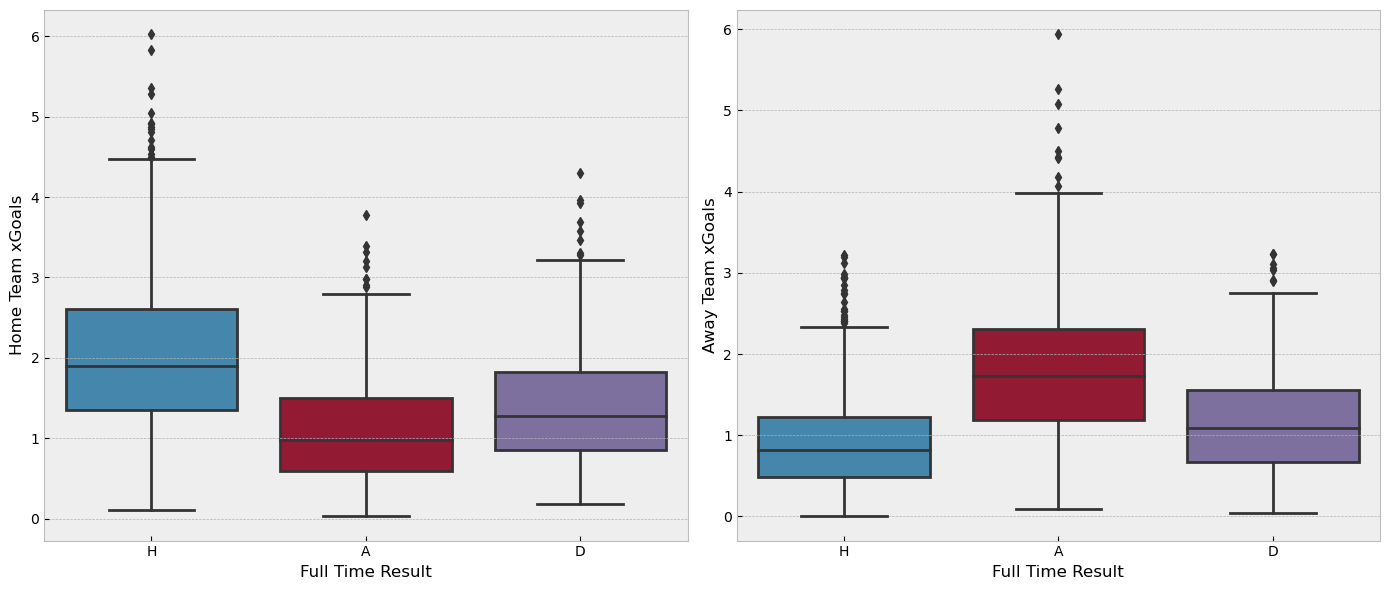

In [56]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.boxplot(x='FTR', y='HxG',data=df, ax=axes[0])
axes[0].set_xlabel('Full Time Result')
axes[0].set_ylabel('Home Team xGoals')

sns.boxplot(x='FTR', y='AxG', data=df, ax=axes[1])
axes[1].set_xlabel('Full Time Result')
axes[1].set_ylabel('Away Team xGoals')

**Xgoal seems to be a good factor when it comes to predicting a football game outcome, because it indicates the high quality goal scoring opportunities a team creates per game. So when the one team has higher xGoal index than the other it is the favorite to score more goals and win the game.**

Text(0, 0.5, 'Away Team deep')

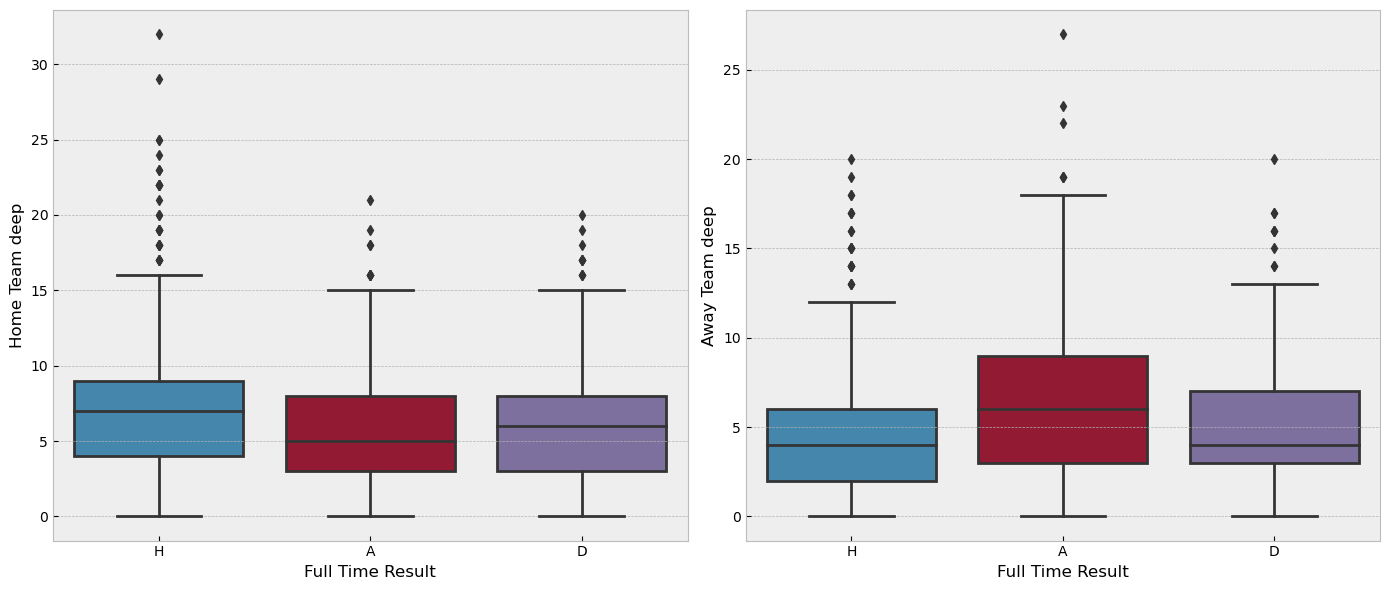

In [57]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.boxplot(x='FTR', y='Hdeep',data=df, ax=axes[0])
axes[0].set_xlabel('Full Time Result')
axes[0].set_ylabel('Home Team deep')

sns.boxplot(x='FTR', y='Adeep', data=df, ax=axes[1])
axes[1].set_xlabel('Full Time Result')
axes[1].set_ylabel('Away Team deep')

**It seems that from deep we cannot actually find who the winner of the game is going to be.** That makes sense because comleting passes does not win you the game. Probably is going to be to use it in combination with other factors.

Text(0, 0.5, 'Away Team Shots on Target')

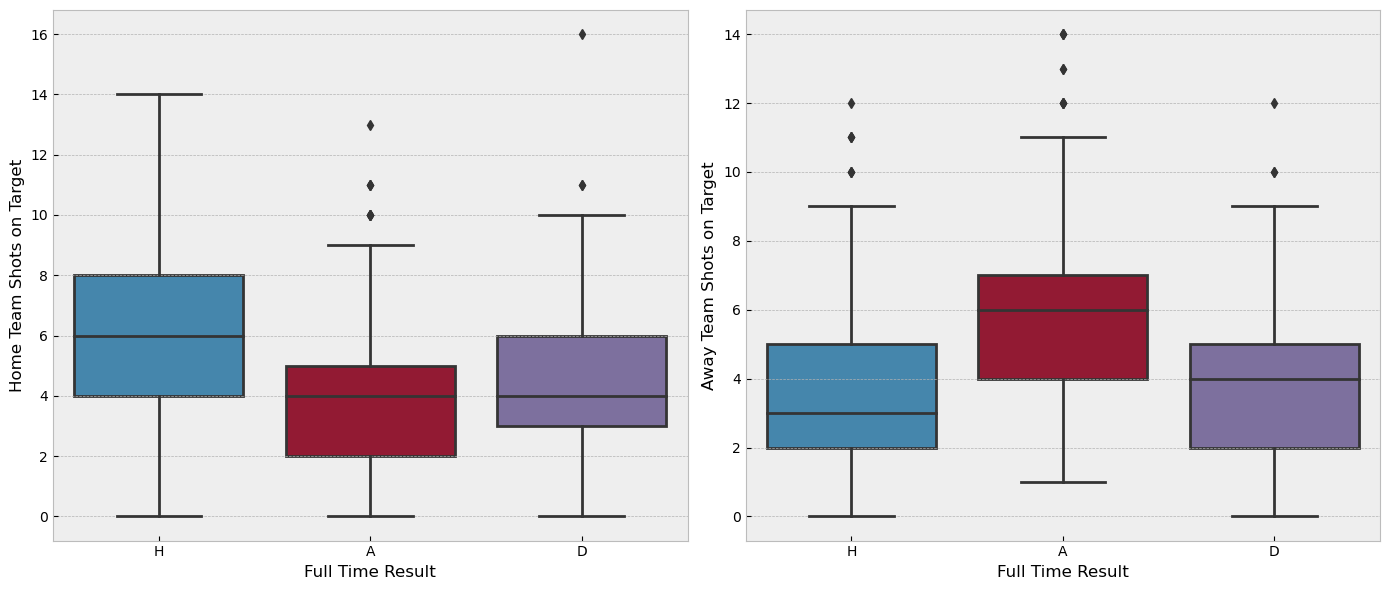

In [58]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.boxplot(x='FTR', y='HST',data=df, ax=axes[0])
axes[0].set_xlabel('Full Time Result')
axes[0].set_ylabel('Home Team Shots on Target')

sns.boxplot(x='FTR', y='AST', data=df, ax=axes[1])
axes[1].set_xlabel('Full Time Result')
axes[1].set_ylabel('Away Team Shots on Target')

Maybe it is a good idea to also use a feature generated from the "HST" and "AST" columns. A team that its shot on target stat is high is not always going to win the game, but that factor indicates the the this team played better.

Text(0, 0.5, 'Away Team ppda_coef')

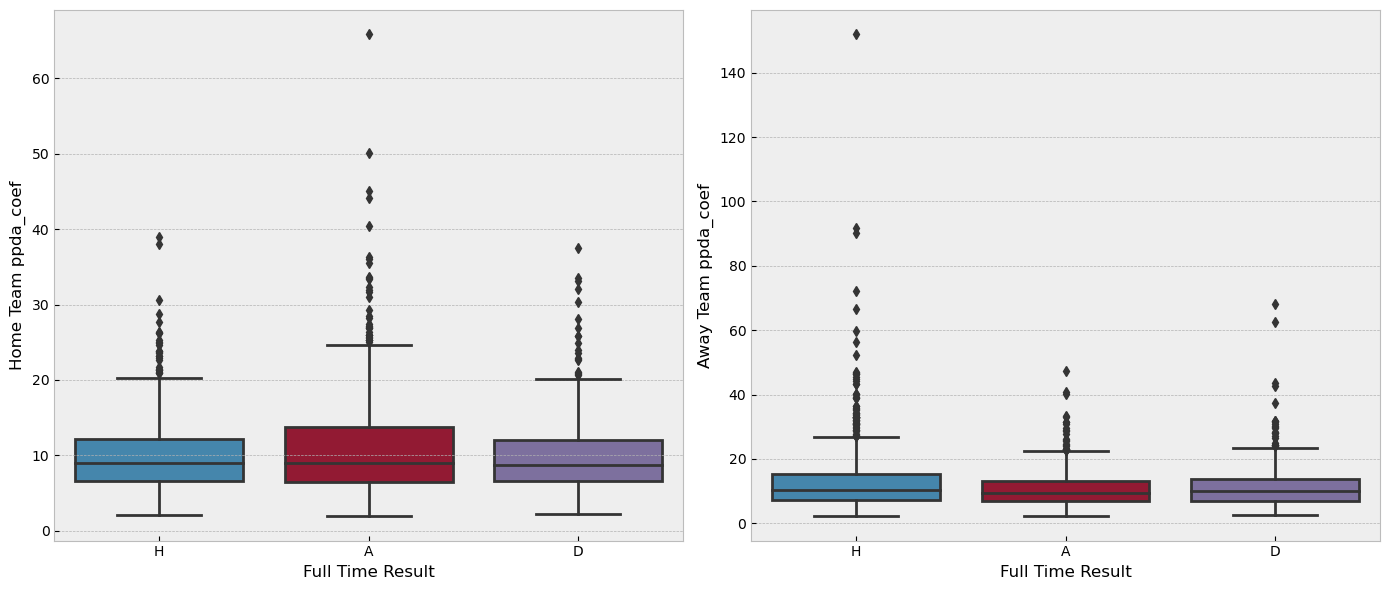

In [59]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.boxplot(x='FTR', y='Hppda_coef',data=df, ax=axes[0])
axes[0].set_xlabel('Full Time Result')
axes[0].set_ylabel('Home Team ppda_coef')

sns.boxplot(x='FTR', y='Appda_coef', data=df, ax=axes[1])
axes[1].set_xlabel('Full Time Result')
axes[1].set_ylabel('Away Team ppda_coef')

The power of pressure of the two teams seem to not have an influence to the outcome of the game.

Text(0, 0.5, 'Away Team expected points')

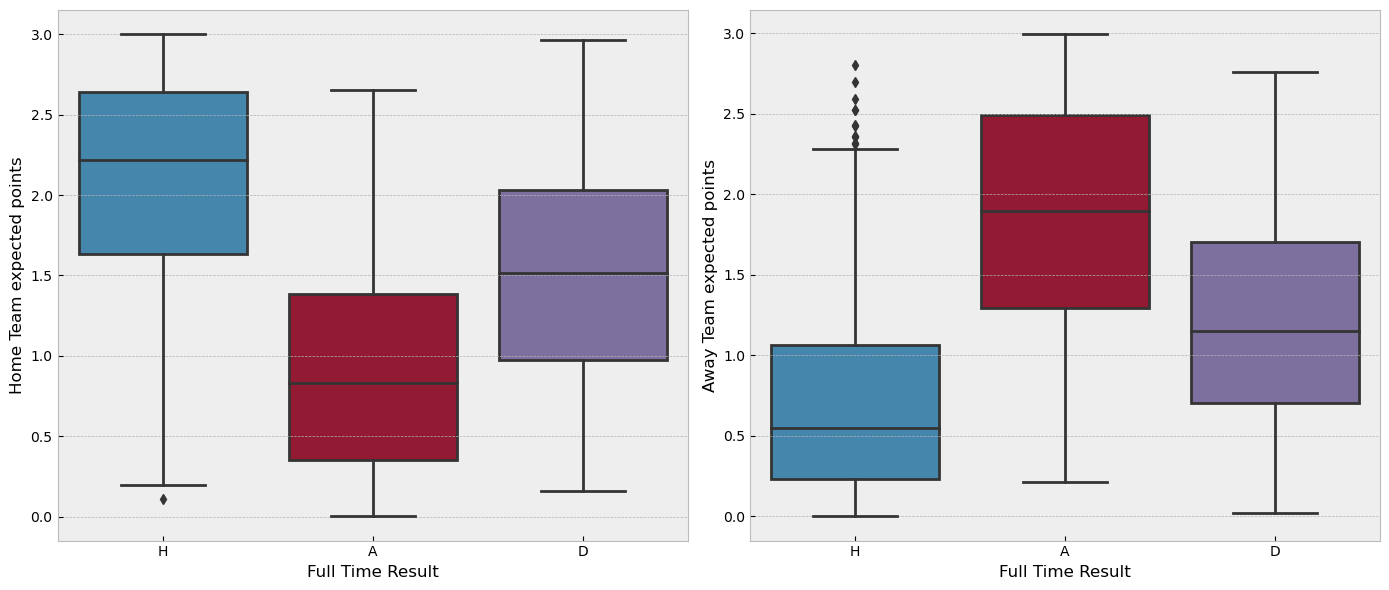

In [59]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.boxplot(x='FTR', y='HTxpts',data=df, ax=axes[0])
axes[0].set_xlabel('Full Time Result')
axes[0].set_ylabel('Home Team expected points')

sns.boxplot(x='FTR', y='ATxpts', data=df, ax=axes[1])
axes[1].set_xlabel('Full Time Result')
axes[1].set_ylabel('Away Team expected points')

**Expected points seems to be a good indicator for predicting a football match result**. 

Text(0, 0.5, 'Away Team expected points')

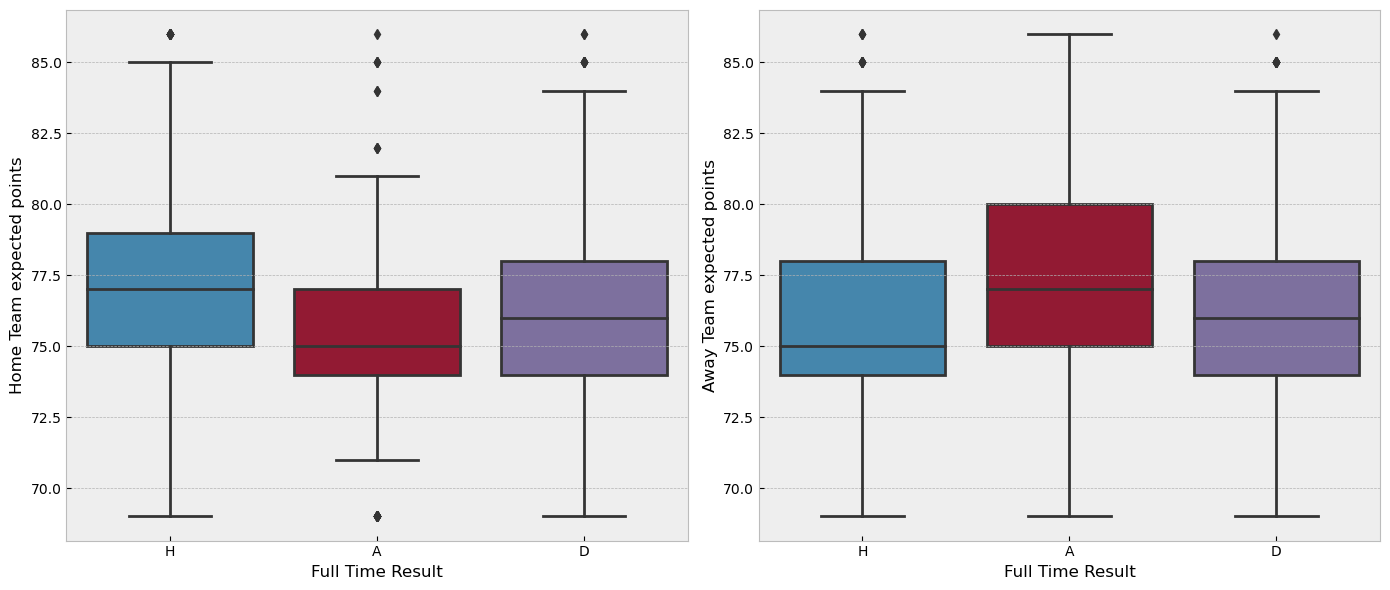

In [60]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.boxplot(x='FTR', y='HTOVA_S',data=df, ax=axes[0])
axes[0].set_xlabel('Full Time Result')
axes[0].set_ylabel('Home Team expected points')

sns.boxplot(x='FTR', y='ATOVA_S', data=df, ax=axes[1])
axes[1].set_xlabel('Full Time Result')
axes[1].set_ylabel('Away Team expected points')

The stronger the team is the more possible is to win if they are playing with an opponent of lower dynamics. Probably it is going a good feature for the different models we are going to use.